# Проект для AиФ "Доброе сердце"

## Цели проекта


**ЦЕЛИ:** Проанализировать данные о благотворителях фонда с целью улучшения эффективности работы с ними.

**ЗАДАЧИ:**

- Провести сегментацию пользователей: RFM-анализ, описание сегментов
- Изучить каналы привлечения пользователей и их эффективность
- Провести когортный анализ, посмотреть на процент удержания (retention)
- Изучить информацию об исторических пользователях


**ДАННЫЕ:**

**Данные о каналах привлечения пользователей - датафрейм `channel`:**
- `user_action` - Название действия пользователя
- `action_date` - Дата действия пользователя
- `channel_id` - Идентификатор канала (описание в текстовом файле)
- `utm_campaign` - Кампания
- `utm_source` - Источник
- `utm_medium` - ?
- `user_id` - Идентификатор пользователя
- `action_time`- Время действия пользователя

**Кодировка каналов привлечения пользователей:**

- `3` - Email',
- `1` - Административный сайт Mindbox',
- `9` - Сайт',
- `99` - utm_term Не указан',
- `5` - Прямой переход',
- `333` - google.com',
- `1930` - b24portal.dobroe-aif.ru',
- `54` - org.telegram.messenger',
- `999` - yandex.ru',
- `888` - razovie',
- `30` - instagram.com',
- `777` - report',
- `132` - yoomoney.ru',
- `10` - vk.com',
- `444` - first-stage',
- `8` - WebPush',
- `222` - vse',
- `555` - roditeli',
- `300` - ida',
- `100` - ok.ru',
- `5120` - congratulations
- `111` - lina'

**Данные о платежах пользователей - датафрейм `order`:**

- `order_id` - Идентификатор платежа
- `action_id` - Идентификатор действия
- `date_time` - Дата и время оформления заказа
- `channel_id` - Идентификатор точки контакта        
- `external_channel_id` - Внешний идентификатор точки контакта      
- `action_channel_name` - Наименование точки контакта     
- `area_id` - Идентификатор региона пользователя   
- `transaction_external_id` - Внешний идентификатор транзакции   
- `order_total_price` - Стоимость заказа        
- `order_website_id` - Идентификатор заказа на сайте        
- `new_year` - Наличие поля с новым годом      
- `next_pay_date` - Дата следующего списания денег   
- `recurrent` - Рекурент да / нет     
- `repayment` - Повторный платеж     
- `product_id_website` - Идентификатор продукта на сайте    
- `product_name` - Название продукта       
- `quantity` - Количество единиц продукта      
- `price_per_item` - Базовая цена за единицу продукта
- `price_of_Line` - Итоговая цена   
- `status_id` - Идентификатор статуса позиции заказа
- `user_id` - Идентификатор пользователя

**Данные о пользователях - датафрейм `id_donor`**

- `recurrent` - Рекуррент да / нет   
- `volunteer` - Волонтер да / нет   
- `sex` - Пол пользователя  
- `area_id` - Идентификатор региона пользователя    
- `area_name` - Название региона пользователя
- `time_zone` - Часовой пояс пользователя
- `time_zone_source` - Источник данных о часовом поясе
- `user_id` - Идентификатор пользователя
- `is_email_invalid` - Почта невалидна да / нет
- `change_datetime` - Дата регистрации / редактирования
- `dobroaif_is_sub` - Подписка
- `sms_is_sub` - Подписка в точке контакта SMS   
- `email_is_sub` - Подписка в точке контакта email
- `viber_is_sub` - Подписка в точке контакта Viber
- `mobilepush_is_sub` - Подписка в точке контакта Mobile Push
- `web_push_sub` - Подписка в точке контакта Web Push





**- Данные об историческом импорте (давние пользователи).**

Нужен только id пользователей, чтобы посмотреть на них сейчас.

## ПЛАН РАБОТЫ

**1. Исследовательский анализ данных**
- Посмотреть в целом на чистоту данных
- Определить исследуемый период
- Проверить данные на наличие пропусков, дубликатов

**2. Исследование пользователей**

**2.1 Как живет исторический импорт – это самые давние доноры:**
- Кто ушел и не проявляет активности
- Кто остался, активен, но не делает пожертвования
- Кто делает пожертвования (разово или рекуррент)

**2.2 Новые пользователи**

- Проанализировать данные без исторических пользователей: анализ без исторических пользователей покажет по каким каналам пришли новые доноры
- Рассчитать средний чек (динамику среднего чека, средний чек по акциям)
- Определить для пользователей главный источник входа (первый)
- Активность по дням недели
- Активность по времени суток
- Топы по пожертвованиям

**2.3 Сегменты**

- RFM анализ: сегменты, статистика по сегментам, поведение по сегментам (сколько “живут” люди в разных сегментах, как часто и сколько тратят на благотворительность, какой канал привлечения, на какие активности тратили деньги)
- Проанализировать каналы привлечения
- Какие акции привели к пикам по платежам

**3. Дополнительно**
- Когортный анализ: retention, количество покупок, средний чек по когорте, LTV


In [1]:
pip -q install ydata-profiling


In [2]:
import pandas as pd
import pickle
from google.colab import drive
from io import BytesIO
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from scipy.stats import spearmanr
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Настройка цветовой гаммы для графиков
palette = sns.color_palette("pastel")

Получение доступа к файлам через ссылки Google Sheets

In [4]:
# Словарь с идентификаторами Google Sheets и соответствующими им именами датасетов
datasets = {
    'historic': '1pPHwGOwmH84JdlKVL3XfFyBJkFP-ZoPBRa9Mpubw_0o',
    'id_donor': '17EdFMIOaL_OmUsIn6XqByNpn0nTJ5OrZLJ6zFDJ7CqA',
    'order': '1DvKVPWsWDC-lh3my38rd7w_Z1Hmc3cVhrVHTuV2hOfw'
}

# Функция для загрузки данных из Google Sheets
def load_data_from_google_sheets(spreadsheet_id):
    file_url = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/export?format=csv'
    response = requests.get(file_url)
    return pd.read_csv(BytesIO(response.content), low_memory=False)

# Загрузка всех данных в словарь, где ключи - это имена датасетов
data = {name: load_data_from_google_sheets(spreadsheet_id) for name, spreadsheet_id in datasets.items()}


historic = data['historic']
id_donor = data['id_donor']
order = data['order']

Загрузка сжатого файла .pkl

In [5]:
! gdown --id 1TrhvYpcTE726vXkfy31vBJYOkj72ssWh

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1TrhvYpcTE726vXkfy31vBJYOkj72ssWh
From (redirected): https://drive.google.com/uc?id=1TrhvYpcTE726vXkfy31vBJYOkj72ssWh&confirm=t&uuid=10abae27-6d73-4733-b698-0bd9d216703e
To: /content/channels.pkl
100% 220M/220M [00:01<00:00, 128MB/s]


In [6]:

channels = pd.read_pickle('/content/channels.pkl')

## Подготовительный анализ данных

**Общая информация. Проверка на пропуски и дубли**

In [7]:
# Изменение имён столбцов на более читаемые

new_column_id_donor = ['recurrent', 'volunteer', 'sex', 'area_id', 'area_name',\
                    'time_zone', 'time_zone_source', 'user_id',\
                    'is_email_invalid', 'change_datetime', 'dobroaif_is_sub', \
                    'sms_is_sub', 'email_is_sub', 'viber_is_sub', \
                    'mobilepush_is_sub','web_push_sub'
                    ]

# Переименование столбцов
if len(new_column_id_donor) == len(id_donor.columns):
    id_donor.columns = new_column_id_donor
else:
    print("Количество новых имен столбцов не совпадает с количеством столбцов в таблице.")

In [8]:
new_column_order = ['order_id', 'action_id', \
                    'date_time', 'channel_id', 'external_channel_id',\
                    'action_channel_name', 'area_id', 'transaction_external_id',\
                    'order_total_price', 'order_website_id', 'new_year', \
                    'next_pay_date', 'recurrent', 'repayment', 'product_id_website', \
                    'product_name','quantity', 'price_per_item', 'price_of_Line', \
                    'status_id', 'user_id'
                    ]

# Переименование столбцов
if len(new_column_order) == len(order.columns):
    order.columns = new_column_order
else:
    print("Количество новых имен столбцов не совпадает с количеством столбцов в таблице.")

In [9]:
# Переименование столбца
historic = historic.rename(columns={'CustomerActionIdsMindboxId': 'user_id'})

Работа со столбцами содержащие даты

In [10]:
# Сдвигаем на 3 часа вперёд

channels['action_date'] = pd.to_datetime(channels['action_date'])
order['date_time'] = pd.to_datetime(order['date_time'], format='%d.%m.%Y %H:%M') + pd.Timedelta(hours=3)
id_donor['change_datetime'] = pd.to_datetime(id_donor['change_datetime'], format='%d.%m.%Y %H:%M') + pd.Timedelta(hours=3)
channels['action_time'] = channels['action_time']+3

# Создание нового столбца для месяцев
channels['month'] = channels['action_date'].dt.to_period('M')
order['month'] = order['date_time'].dt.to_period('M')
id_donor['month'] = id_donor['change_datetime'].dt.to_period('M')

# Создание нового столбца с названием дня недели на русском языке
order['day_of_week'] = order['date_time'].dt.strftime('%A')

# Создание нового столбца с временем суток (часами)
order['hour_of_day'] = order['date_time'].dt.hour

order['date'] = order['date_time'].dt.date
order['date'] = pd.to_datetime(order['date'])

In [11]:
channels.isnull().mean(axis=0).sort_values(ascending=False)

utm_campaign   0.98
utm_source     0.98
utm_medium     0.98
user_action    0.00
action_date    0.00
channel_id     0.00
user_id        0.00
action_time    0.00
month          0.00
dtype: float64

In [12]:
channels.duplicated().mean()

0.07851856557507227

In [13]:
# Удаление дубликатов

channels.drop_duplicates(inplace=True)

In [14]:
# Оставляю необходимые для работы столбцы

channels = channels[['user_action', 'action_date', 'channel_id', 'user_id', 'action_time', 'month']]

In [15]:
order.isnull().mean(axis=0).sort_values(ascending=False)

area_id                   1.00
transaction_external_id   1.00
next_pay_date             1.00
new_year                  0.97
repayment                 0.92
price_per_item            0.19
recurrent                 0.17
product_name              0.00
hour_of_day               0.00
day_of_week               0.00
month                     0.00
user_id                   0.00
status_id                 0.00
price_of_Line             0.00
quantity                  0.00
order_id                  0.00
product_id_website        0.00
action_id                 0.00
order_website_id          0.00
order_total_price         0.00
action_channel_name       0.00
external_channel_id       0.00
channel_id                0.00
date_time                 0.00
date                      0.00
dtype: float64

In [16]:
order.duplicated().mean()

0.0

In [17]:
order = order[['order_id','action_id', 'date_time', 'channel_id', \
               'action_channel_name', 'order_total_price', \
               'next_pay_date', 'recurrent', 'repayment', 'product_name', \
               'quantity', 'price_of_Line', 'status_id', 'user_id', 'month', \
               'day_of_week', 'hour_of_day', 'date']]

In [18]:
id_donor.isnull().mean(axis=0).sort_values(ascending=False)

volunteer           1.00
viber_is_sub        1.00
mobilepush_is_sub   1.00
dobroaif_is_sub     1.00
sms_is_sub          1.00
web_push_sub        0.98
area_id             0.79
area_name           0.79
recurrent           0.75
time_zone           0.51
time_zone_source    0.51
sex                 0.21
is_email_invalid    0.02
email_is_sub        0.01
change_datetime     0.00
user_id             0.00
month               0.00
dtype: float64

In [19]:
id_donor.duplicated().mean()

0.0

In [20]:
id_donor = id_donor[['recurrent', 'sex', 'area_name', 'area_id', 'time_zone', \
               'user_id', 'change_datetime', 'month']]

In [21]:
historic.duplicated().mean()

0.0

Заменю id каналов привлечения на реальные названия из словаря, который имеется в данных

In [22]:
# Перевожу столбец с id канала в строку, чтобы потом можно было id заменить на реальное название канала привлечения.

channels['channel_id'] = channels['channel_id'].astype('string')
order['channel_id'] = order['channel_id'].astype('string')

In [23]:
# Заменяем значения в столбце channels['channel_id']
channel_dict = {
    '3': 'Email',
    '1': 'Административный сайт Mindbox',
    '9': 'Сайт',
    '99': 'utm_term Не указан',
    '5': 'Прямой переход',
    '333': 'google.com',
    '1930': 'b24portal.dobroe-aif.ru',
    '54': 'org.telegram.messenger',
    '999': 'yandex.ru',
    '888': 'razovie',
    '30': 'instagram.com',
    '777': 'report',
    '132': 'yoomoney.ru',
    '10': 'vk.com',
    '444': 'first-stage',
    '8': 'WebPush',
    '222': 'vse',
    '555': 'roditeli',
    '300': 'ida',
    '100': 'ok.ru',
    '5120': 'congratulations',
    '111': 'lina'
}

# Преобразуем значения столбца channel_id на основе словаря
channels['channel_id'] = channels['channel_id'].map(channel_dict)
order['channel_id'] = order['channel_id'].map(channel_dict)

## Исследовательский анализ

### "Старые" доноры

Нахожу только тех доноров, которые были предоставлены в "старой" таблице (`historic`)

In [24]:
# Уникальные user_id в таблице historic
unique_historic_users = historic['user_id'].unique()

# Фильтрую таблицу id_donor, оставив только те строки, где user_id содержится в unique_user_ids
old_id_donor = id_donor[id_donor['user_id'].isin(unique_historic_users)]

In [25]:
# Вычисляю новых донаров в таблице id_donor путём вычитания старых доноров из новой таблицы

new_user = id_donor['user_id'].nunique() - old_id_donor['user_id'].nunique()

# Процент уникальных старых и новых донаров
old_users_percentage = ((id_donor['user_id'].nunique() - new_user) / id_donor['user_id'].nunique()) * 100
new_users_percentage = (new_user / id_donor['user_id'].nunique()) * 100

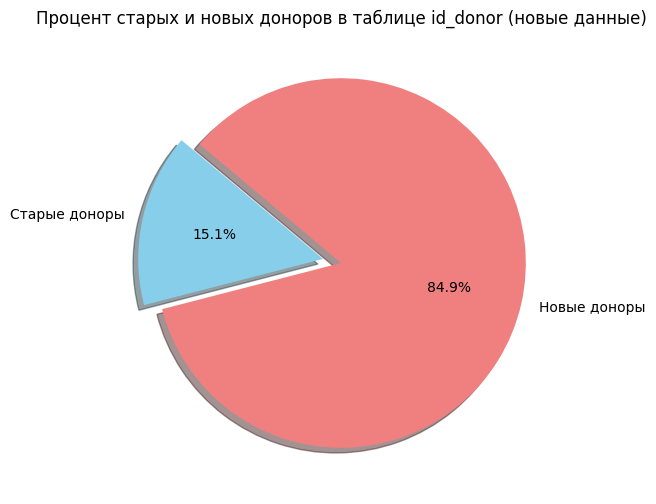

In [26]:
# Построение круговой диаграммы
labels = ['Старые доноры', 'Новые доноры']
sizes = [old_users_percentage, new_users_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Выделение первого кусочка (старые пользователи)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Процент старых и новых доноров в таблице id_donor (новые данные)')
plt.show()

**Старые доноры, которых нет в новых данных**

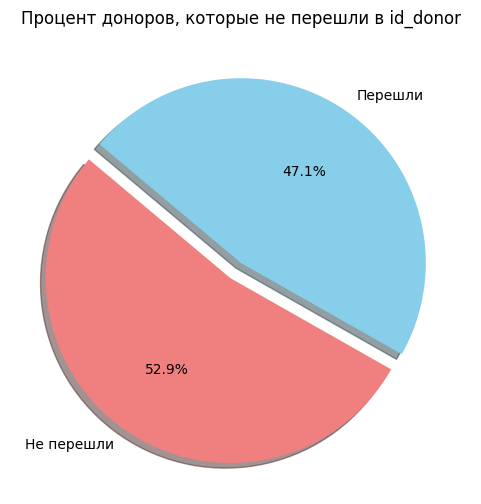

In [27]:
# Уникальные user_id в таблице id_donor
unique_donor_ids = id_donor['user_id'].unique()

# Найти доноров, которые не перешли в таблицу id_donor['user_id']
not_in_donor = len(set(unique_historic_users) - set(unique_donor_ids))

# Количество доноров, которые перешли в таблицу id_donor
in_donor = len(set(unique_historic_users).intersection(set(unique_donor_ids)))

# Общее количество доноров в таблице historic
total_historic_users = len(unique_historic_users)

# Процентное соотношение
not_in_donor_percentage = (not_in_donor / total_historic_users) * 100
in_donor_percentage = (in_donor / total_historic_users) * 100

# Построение круговой диаграммы
labels = ['Не перешли', 'Перешли']
sizes = [not_in_donor_percentage, in_donor_percentage]
colors = ['lightcoral', 'skyblue']
explode = (0.1, 0)  # Выделение первого кусочка (не перешли)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Процент доноров, которые не перешли в id_donor')
plt.show()

**Старые доноры, которые остались и платят**

In [28]:
# Отфильтровываем данные в таблице order и получаем только платящих доноров из старой таблицы.
old_user_order = order[order['user_id'].isin(old_id_donor['user_id'])]

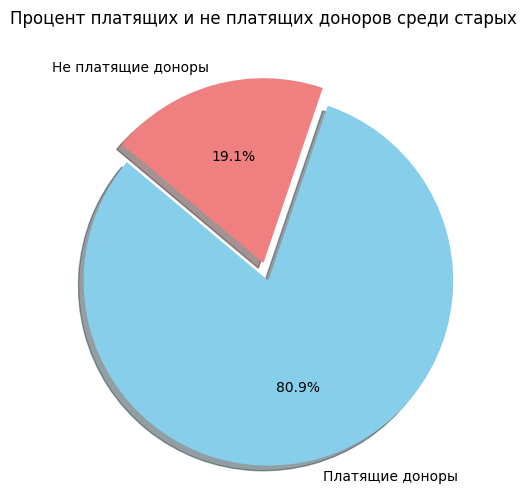

In [29]:
# Доноры, которые платят
paying_users = old_user_order['user_id'].unique()

# Доноры, которые не платят
non_paying_users = old_id_donor[~old_id_donor['user_id'].isin(paying_users)]['user_id'].nunique()

# Процентное соотношение
total_old_users = old_id_donor['user_id'].nunique()
paying_users_percentage = (len(paying_users) / total_old_users) * 100
non_paying_users_percentage = (non_paying_users / total_old_users) * 100


# Построение круговой диаграммы
labels = ['Платящие доноры', 'Не платящие доноры']
sizes = [paying_users_percentage, non_paying_users_percentage]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # Выделение первого кусочка (платящие пользователи)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Процент платящих и не платящих доноров среди старых')
plt.show()

**Кто из старых платящих доноров платит по подписке, а кто без**

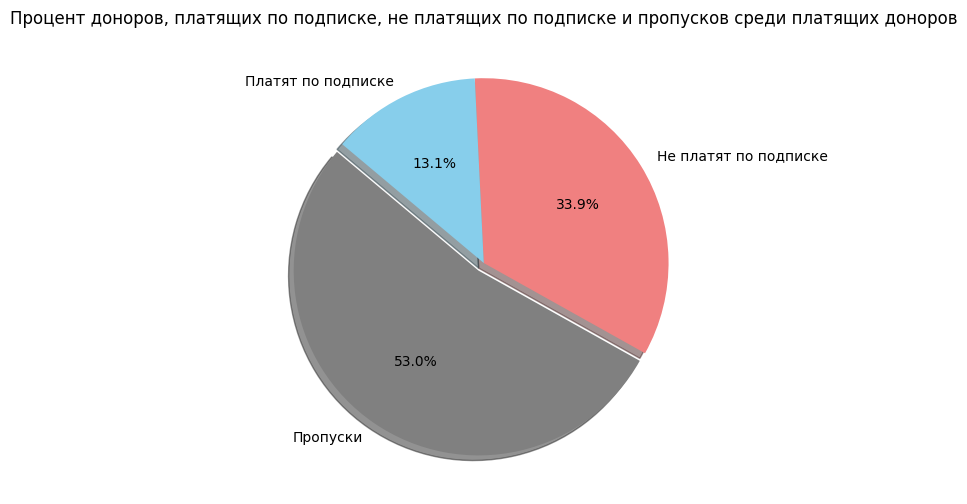

In [30]:
# Вычисление количества доноров по категориям

# Подсчет количества уникальных значений в столбце status_id
status_counts = old_user_order['recurrent'].value_counts(dropna=False)

# Метки для круговой диаграммы
labels = ['Пропуски', 'Не платят по подписке', 'Платят по подписке']

# Размеры каждого сектора
sizes = status_counts.values

# Цвета для каждого сектора
colors = ['grey', 'lightcoral', 'skyblue']

# Опционально можно выделить первый сектор
explode = [0.05] + [0] * (len(status_counts) - 1)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Процент доноров, платящих по подписке, не платящих по подписке и пропусков среди платящих доноров')
plt.show()

**Активность старых доноров в 2024 году и их платежи**


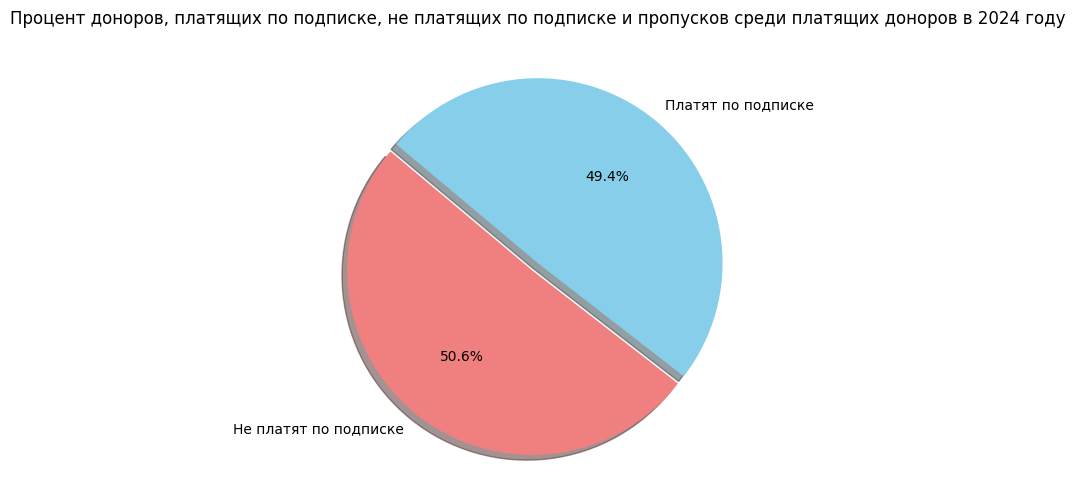

In [31]:
# Старые доноры, которые платят

order_old = order[order['user_id'].isin(old_id_donor['user_id'])]

#  Которые платили именно в 2024 году
old_id_donor_2024 = order_old.query('date_time > "2024-01-01"')


# Подсчет количества уникальных значений в столбце status_id
status_counts = old_id_donor_2024['recurrent'].value_counts(dropna=False)

# Метки для круговой диаграммы
labels = ['Не платят по подписке', 'Платят по подписке']

# Размеры каждого сектора
sizes = status_counts.values

# Цвета для каждого сектора
colors = ['lightcoral', 'skyblue']

# Опционально можно выделить первый сектор
explode = [0.05] + [0] * (len(status_counts) - 1)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Процент доноров, платящих по подписке, не платящих по подписке и пропусков среди платящих доноров в 2024 году')
plt.show()

**Суммы донатов самых преданных доноров (Старые платящие в новых данных)**



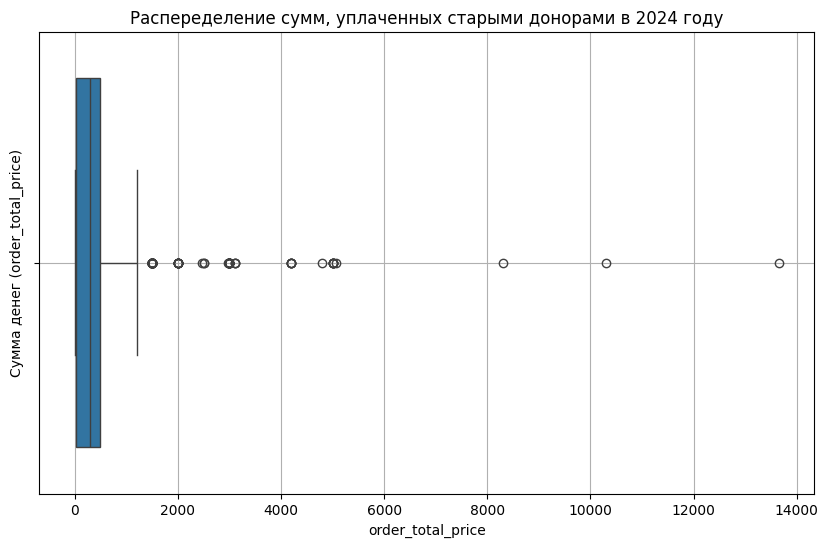

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=old_id_donor_2024['order_total_price'])

plt.title('Распеределение сумм, уплаченных старыми донорами в 2024 году')
plt.ylabel('Сумма денег (order_total_price)')
plt.grid(True)
plt.show()

Сколько платят старые пользователи в 2024 году по сравнению с новыми пользователями.

In [33]:
print(f"Медианное значение суммы платежа старого донора (2024 год): {old_id_donor_2024['order_total_price'].median()} руб.")
print(f"Среднее значение суммы платежа старого донора (2024 год): {old_id_donor_2024['order_total_price'].mean():.2f} руб.")

new_id_donor = order[~order['user_id'].isin(unique_historic_users)]

print(f"Медианное значение суммы платежа нового донора: {new_id_donor['order_total_price'].median()} руб.")
print(f"Среднее значение суммы платежа нового донора: {new_id_donor['order_total_price'].mean():.2f} руб.")

Медианное значение суммы платежа старого донора (2024 год): 300.0 руб.
Среднее значение суммы платежа старого донора (2024 год): 528.76 руб.
Медианное значение суммы платежа нового донора: 300.0 руб.
Среднее значение суммы платежа нового донора: 996.35 руб.


**Каналы привлечения старых доноров**

In [34]:
# Создание нового DataFrame channels_old с каналами привлечения, содержащего только тех старых доноров из "старой" таблицы.

channels_old = channels[channels['user_id'].isin(old_id_donor['user_id'])]

In [35]:
# Подготовка таблицы, где задача посмотреть каналы привлечения по старым донорам
channels_old = channels_old.sort_values(by=['user_id', 'action_date'])
channels_old_group = channels_old.groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'}).reset_index()
channels_old_group = channels_old_group.groupby('channel_id')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)

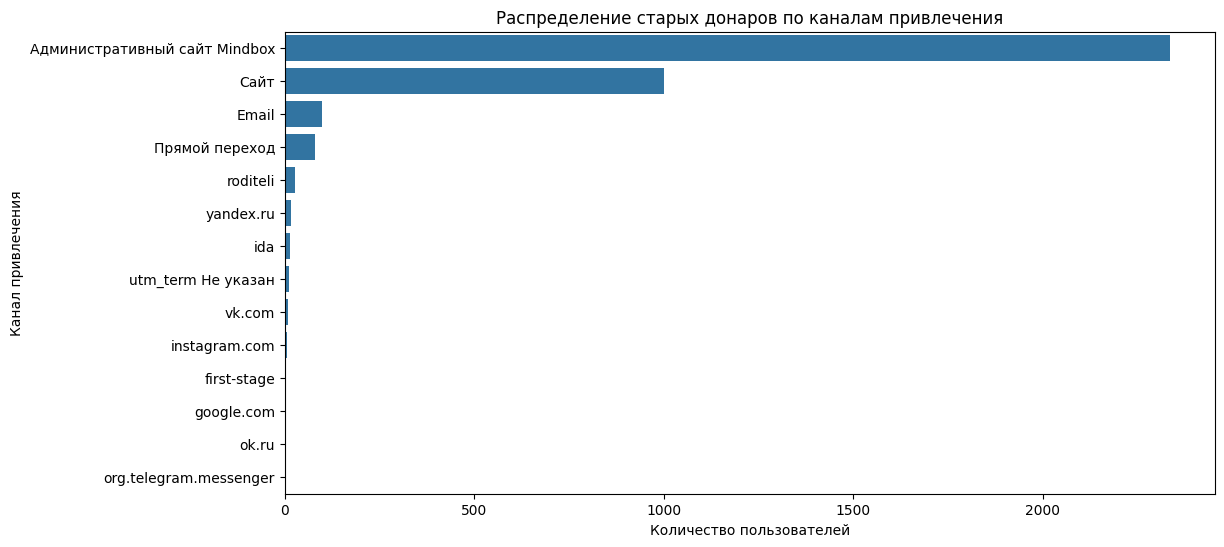

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=channels_old_group, x='user_id', y='channel_id')
plt.title('Распределение старых донаров по каналам привлечения')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал привлечения')
plt.xticks()
plt.show()

In [37]:
# Хочу исключить первые 2 канала для более наглядной картины по остальным.

channels_old_group_filtered = channels_old_group.tail(12)

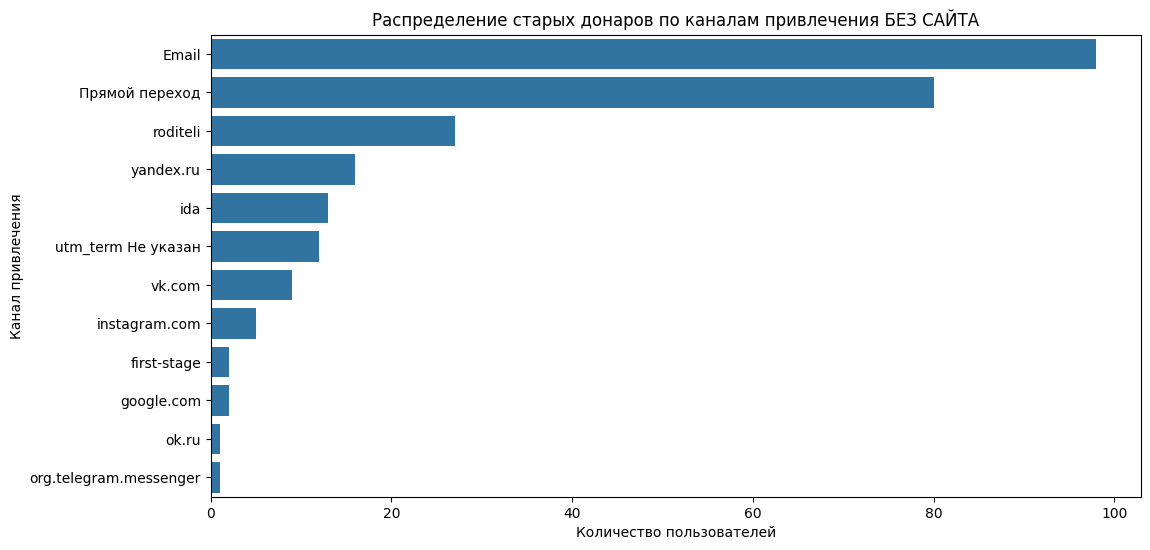

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=channels_old_group_filtered, x='user_id', y='channel_id')
plt.title('Распределение старых донаров по каналам привлечения БЕЗ САЙТА')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал привлечения')
plt.xticks()
plt.show()

### "Новые" доноры

С этого момента использовается период начиная с **1 Апреля 2022 года** и до последей имеющейся даты.

In [39]:
# Устанавливаем дату начала периода анализа
start_date = pd.Timestamp('2022-04-01')

# Фильтрация данных начиная с 1 апреля 2022 года
channels = channels.loc[channels['action_date'] >= start_date]
order = order.loc[order['date_time'] >= start_date]
id_donor = id_donor.loc[id_donor['change_datetime'] >= start_date]

In [40]:
new_id_donor = id_donor[~id_donor['user_id'].isin(historic['user_id'])]

In [41]:
# Создание нового DataFrame channels_new с каналами привлечения, содержащего только новых донаров

channels_new = channels[channels['user_id'].isin(new_id_donor['user_id'])]

In [42]:
# Подготовка таблицы для того чтобы посмотреть каналы привлечения по старым донорам
channels_new = channels_new.sort_values(by=['user_id', 'action_date'])
channels_new_group = channels_new.groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'}).reset_index()
channels_new_group = channels_new_group.groupby('channel_id')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)

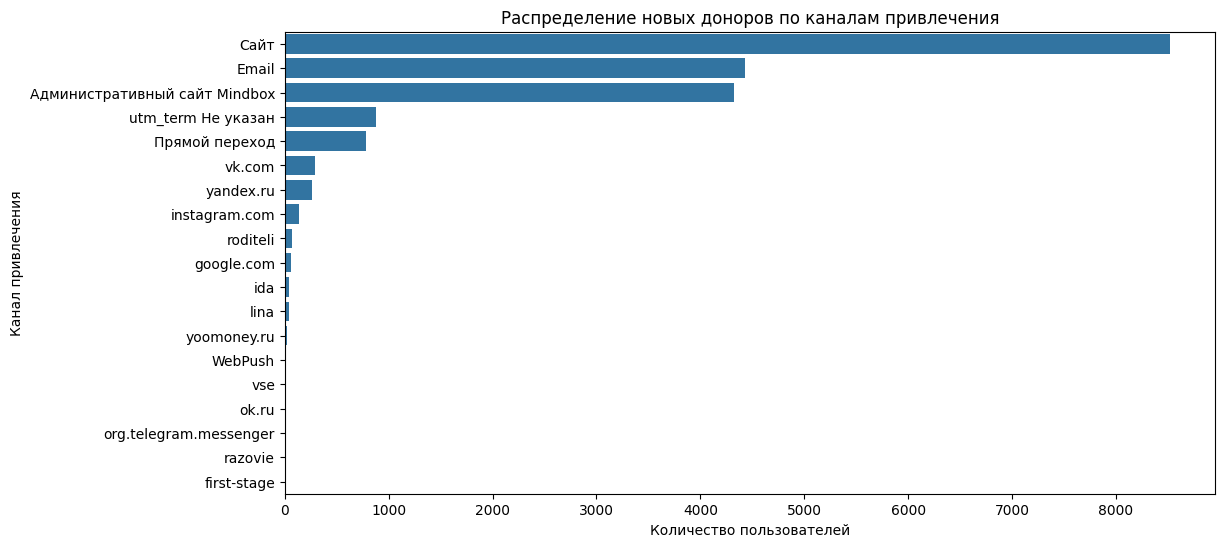

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data=channels_new_group, x='user_id', y='channel_id')
plt.title('Распределение новых доноров по каналам привлечения')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал привлечения')
plt.xticks()
plt.show()

In [44]:
channels_new_group_filtered = channels_new_group.tail(16)

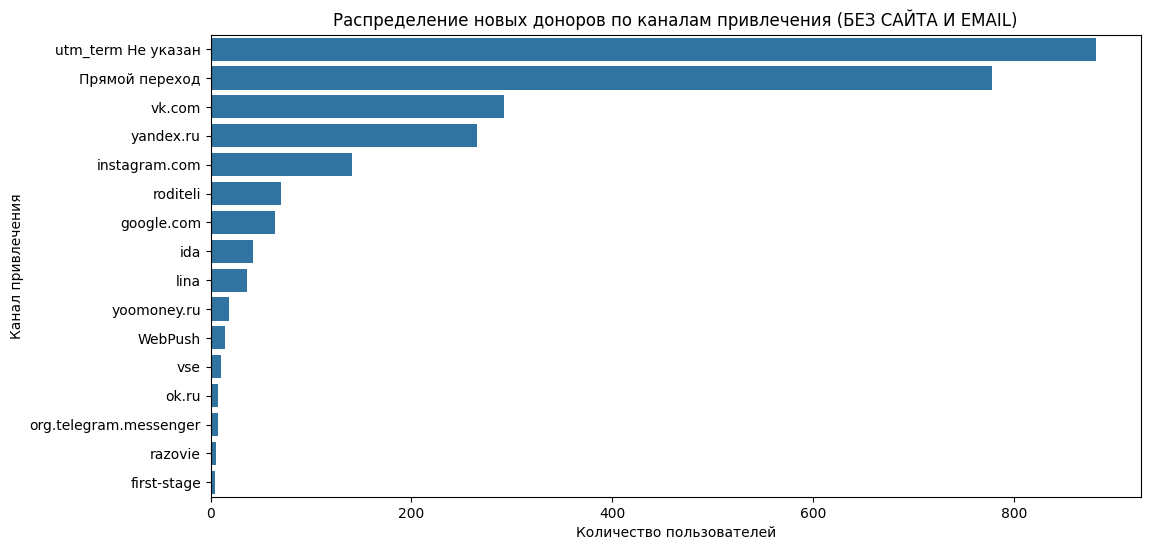

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(data=channels_new_group_filtered, x='user_id', y='channel_id')
plt.title('Распределение новых доноров по каналам привлечения (БЕЗ САЙТА И EMAIL)')
plt.xlabel('Количество пользователей')
plt.ylabel('Канал привлечения')
plt.xticks()
plt.show()

**Количество привлеченных пользователей по каналам (первое касание)**

In [46]:
# Выделяем только первое касаения донора

channels_group = channels.groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'}).reset_index()

# Подсчёт количества единичных касаний каждого донора по каналам привлечения

channels_group = channels_group.groupby('channel_id')['user_id'].count(). \
reset_index().sort_values(by='user_id', ascending=False).rename(columns={'user_id': 'count_first'})

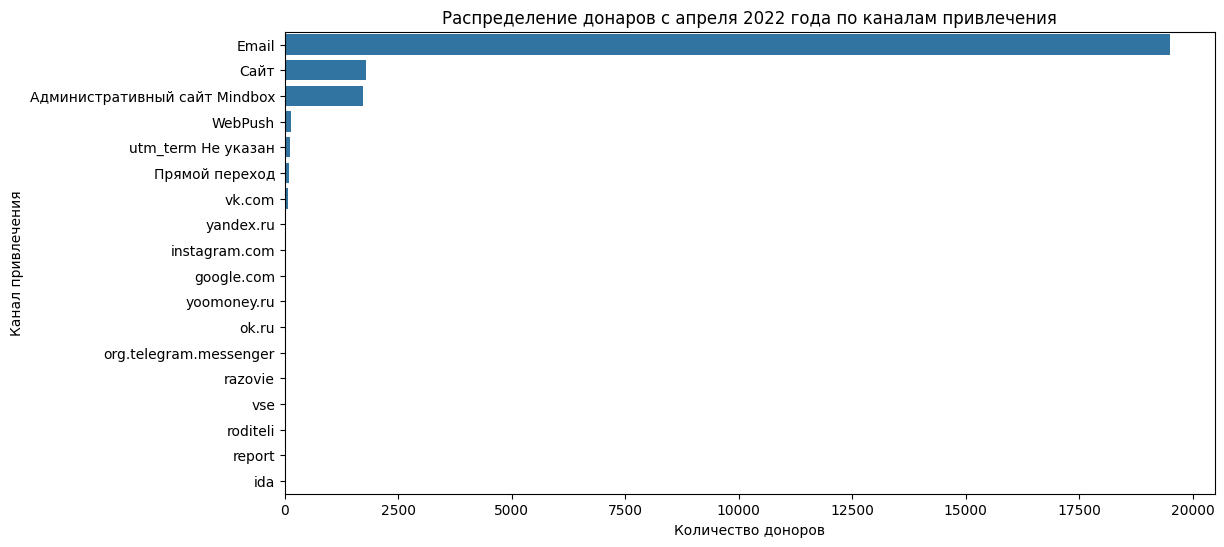

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=channels_group, x='count_first', y='channel_id')
plt.title('Распределение донаров с апреля 2022 года по каналам привлечения')
plt.xlabel('Количество доноров')
plt.ylabel('Канал привлечения')
plt.xticks()
plt.show()

In [48]:
channels_group_filtered = channels_group.tail(15)

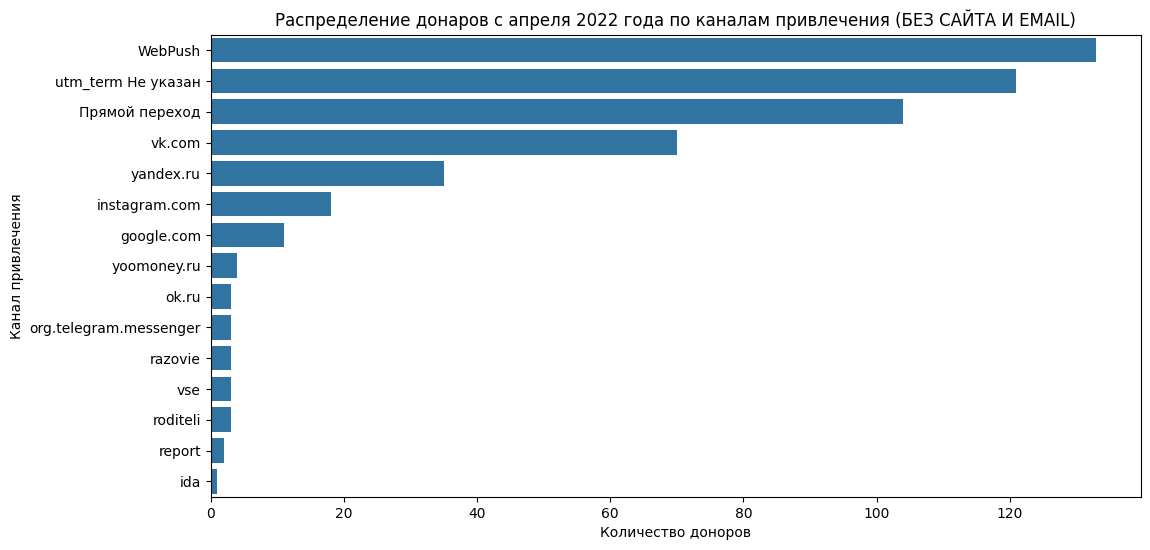

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=channels_group_filtered, x='count_first', y='channel_id')
plt.title('Распределение донаров с апреля 2022 года по каналам привлечения (БЕЗ САЙТА И EMAIL)')
plt.xlabel('Количество доноров')
plt.ylabel('Канал привлечения')
plt.xticks()
plt.show()

### Акции

In [50]:
# Просмотр уникальных значений

# order['product_name'].nunique()

In [51]:
# Удаляем  строку в начале каждого значения
order['product_name'] = order['product_name'].str.replace(
    'Пожертвование Благотворительный фонд «АиФ. Доброе сердце» ', '', regex=False)

order['product_name'] = order['product_name'].str.replace(
    'Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»', 'Пожертвование «АиФ. Доброе сердце»'
)

**Смотрю общую сумму сборов по акциям**

In [52]:
product_group_sum_top15 = order.groupby('product_name').agg({'order_total_price':'sum'}) \
.reset_index().sort_values(by='order_total_price', ascending=False).head(15)

product_group_count_top15 = order.groupby('product_name').agg({'order_id':'count'}) \
.reset_index().rename(columns={'order_id': 'count_orders'}).sort_values(by='count_orders', ascending=False).head(15)

product_group_sum_top15['order_total_price_ml'] = product_group_sum_top15['order_total_price'] / 1000000

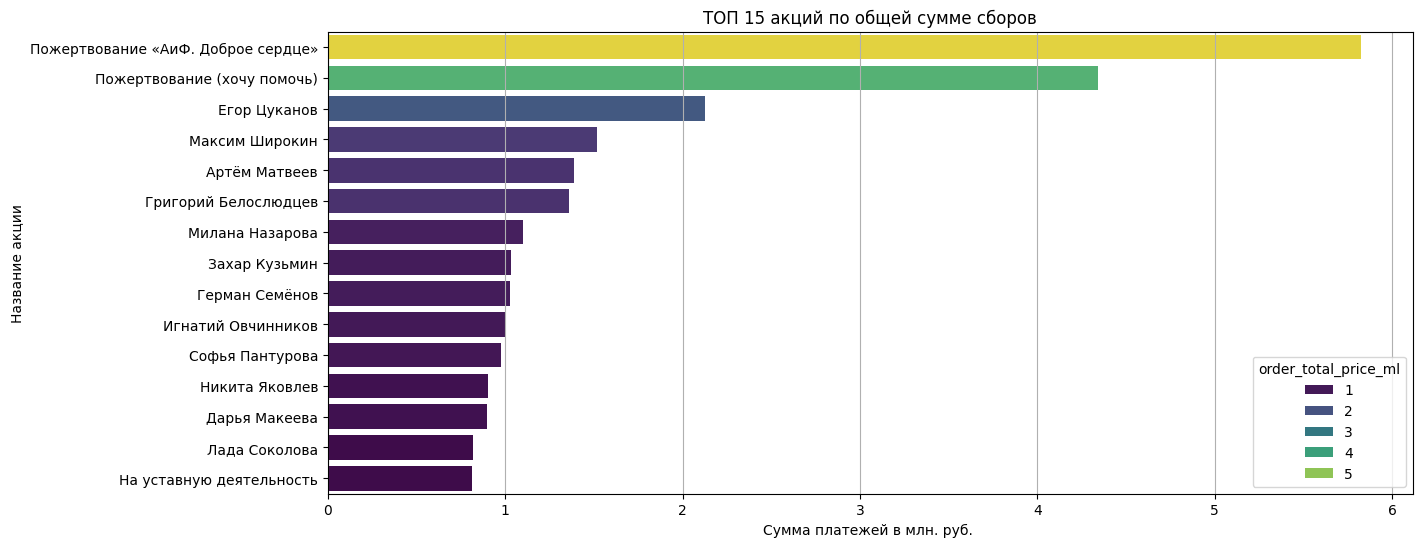

In [53]:
plt.figure(figsize=(14, 6))
sns.barplot(data=product_group_sum_top15, x='order_total_price_ml', y='product_name', hue='order_total_price_ml',  palette='viridis')
plt.title('ТОП 15 акций по общей сумме сборов')
plt.xlabel('Сумма платежей в млн. руб. ')
plt.ylabel('Название акции')
plt.grid(axis='x')
plt.show()

In [54]:
product_group_sum_tail15 = order.groupby('product_name').agg({'order_total_price':'sum'}) \
.reset_index().sort_values(by='order_total_price').head(15)

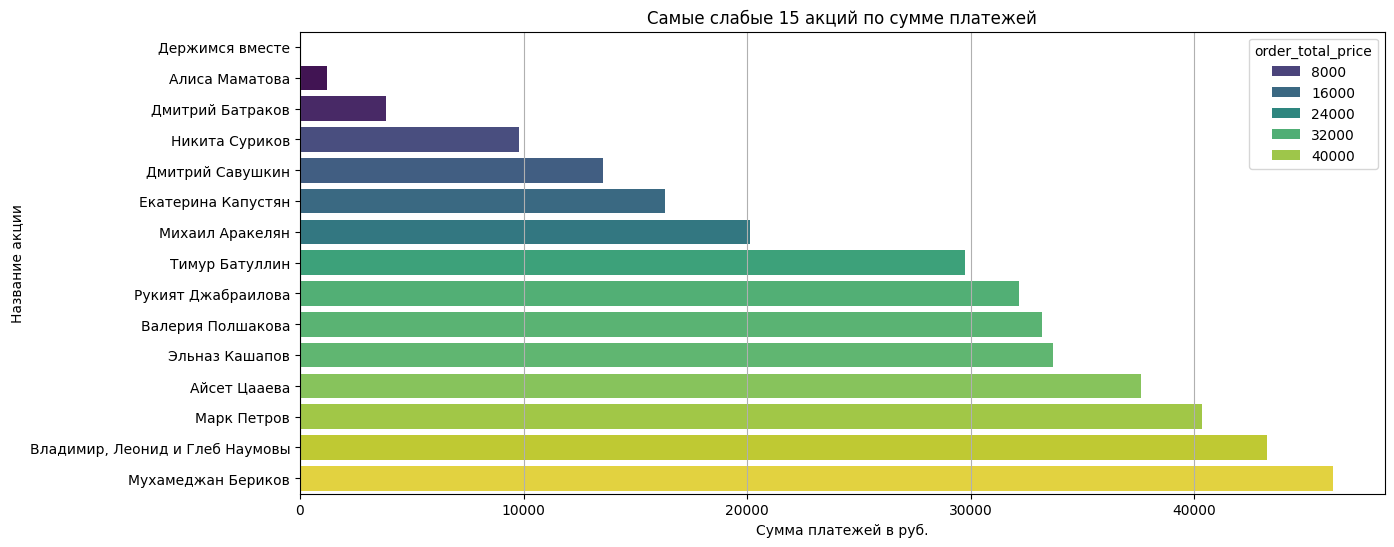

In [55]:
plt.figure(figsize=(14, 6))
sns.barplot(data=product_group_sum_tail15, x='order_total_price', y='product_name', hue='order_total_price',  palette='viridis')
plt.title('Самые слабые 15 акций по сумме платежей')
plt.xlabel('Сумма платежей в руб.')
plt.ylabel('Название акции')
plt.grid(axis='x')
plt.show()

**Количество платежей по акциям**

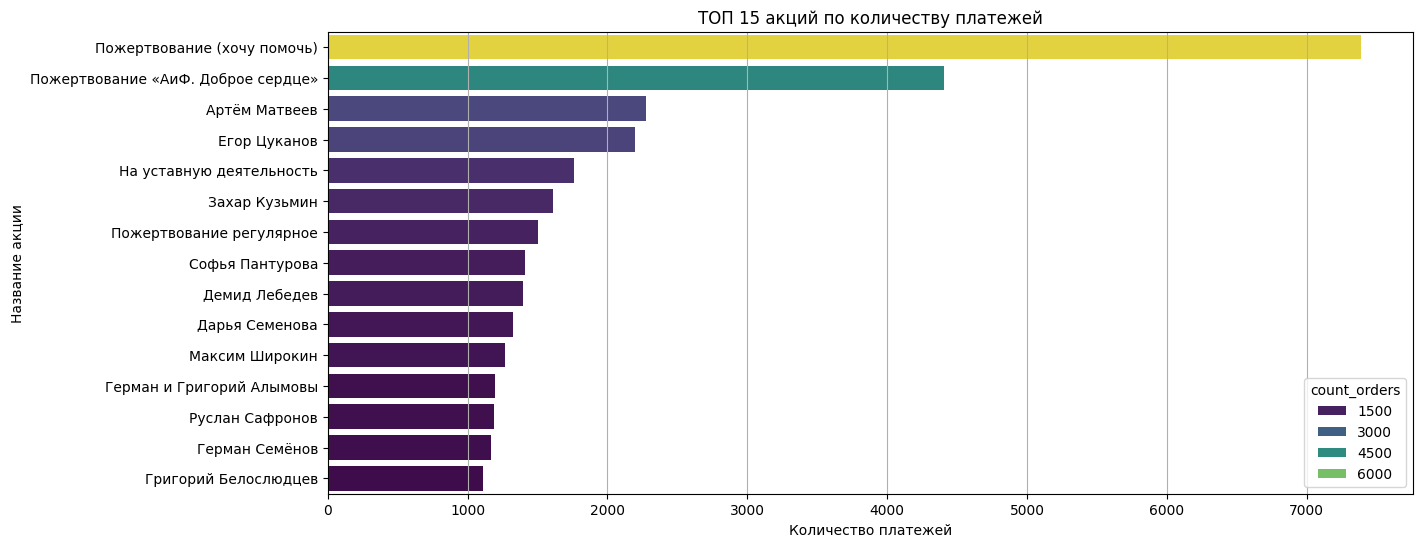

In [56]:
plt.figure(figsize=(14, 6))
sns.barplot(data=product_group_count_top15, x='count_orders', y='product_name', hue='count_orders', palette='viridis')
plt.title('ТОП 15 акций по количеству платежей')
plt.xlabel('Количество платежей')
plt.ylabel('Название акции')
plt.grid(axis='x')
plt.show()

In [57]:
product_group_mean = order.groupby('product_name').agg({'order_total_price':'mean'}) \
.reset_index().sort_values(by='order_total_price', ascending=False).head(15)

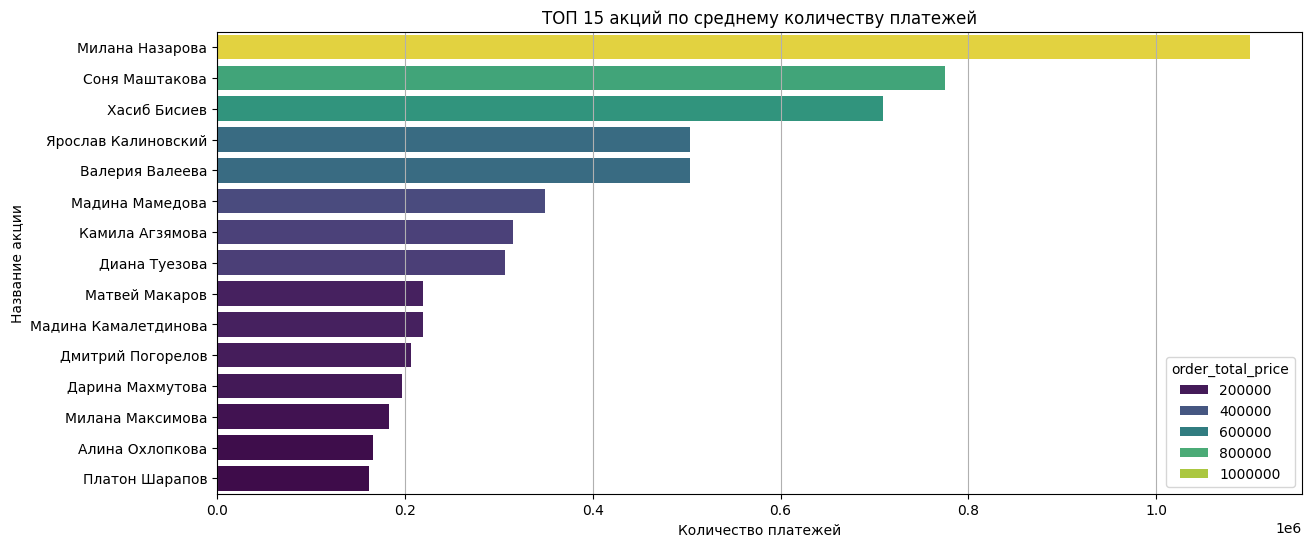

In [58]:
plt.figure(figsize=(14, 6))
sns.barplot(data=product_group_mean, x='order_total_price', y='product_name', hue='order_total_price', palette='viridis')
plt.title('ТОП 15 акций по среднему количеству платежей')
plt.xlabel('Количество платежей')
plt.ylabel('Название акции')
plt.grid(axis='x')
plt.show()

In [59]:
order_corr = order.groupby('product_name').agg({'order_total_price':'sum', 'order_id': 'count'}) \
.reset_index().rename(columns={'order_id': 'count'})

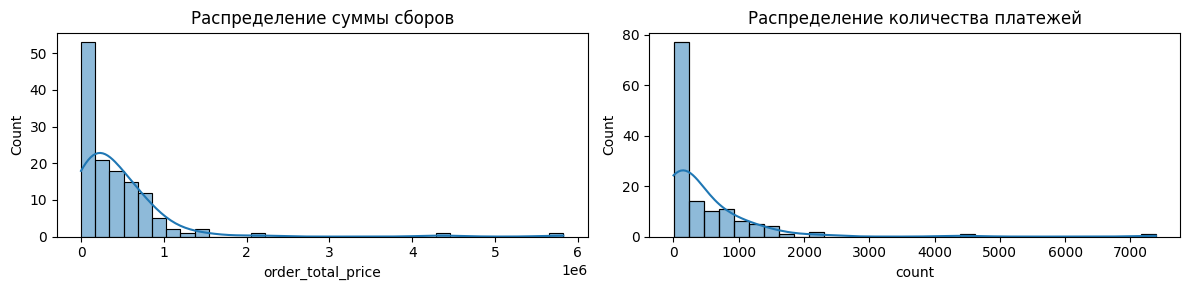

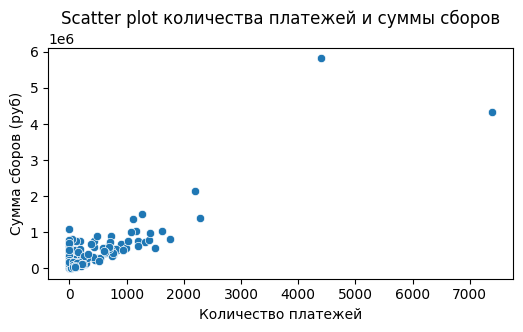

In [60]:
# Гистограммы для оценки распределения данных
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(order_corr['order_total_price'], kde=True)
plt.title('Распределение суммы сборов')

plt.subplot(1, 2, 2)
sns.histplot(order_corr['count'], kde=True)
plt.title('Распределение количества платежей')

plt.tight_layout()
plt.show()

# Визуализация корреляции
plt.figure(figsize=(6, 3))
sns.scatterplot(x='count', y='order_total_price', data=order_corr)
plt.title('Scatter plot количества платежей и суммы сборов')
plt.xlabel('Количество платежей')
plt.ylabel('Сумма сборов (руб)')
plt.show()


In [61]:
# Вычисление корреляции

spearman_corr, _ = spearmanr(order_corr['order_total_price'], order_corr['count'])

print(f"Коэффициент корреляции Спирмена: {spearman_corr}")

Коэффициент корреляции Спирмена: 0.579376584645325


Существует средний уровень корреляции между суммой сборов и количеством платежей по акции.

Например, если бы достаточно часто сборы завершались благодаря одному "большому" донору, то корреляция могла бы быть ниже.

**Длительность акций**

Так как акций много и на график всё сложно поместить можно взять топ 15 самых успешных с точки зрения сумм и количества платежей.


In [62]:
# Исключаю акции, которые работают на постоянной основе

order_period = order.query('product_name != "Пожертвование «АиФ. Доброе сердце»" and \
product_name != "Пожертвование" and product_name != "Пожертвование (хочу помочь)" and product_name != "На уставную деятельность"')

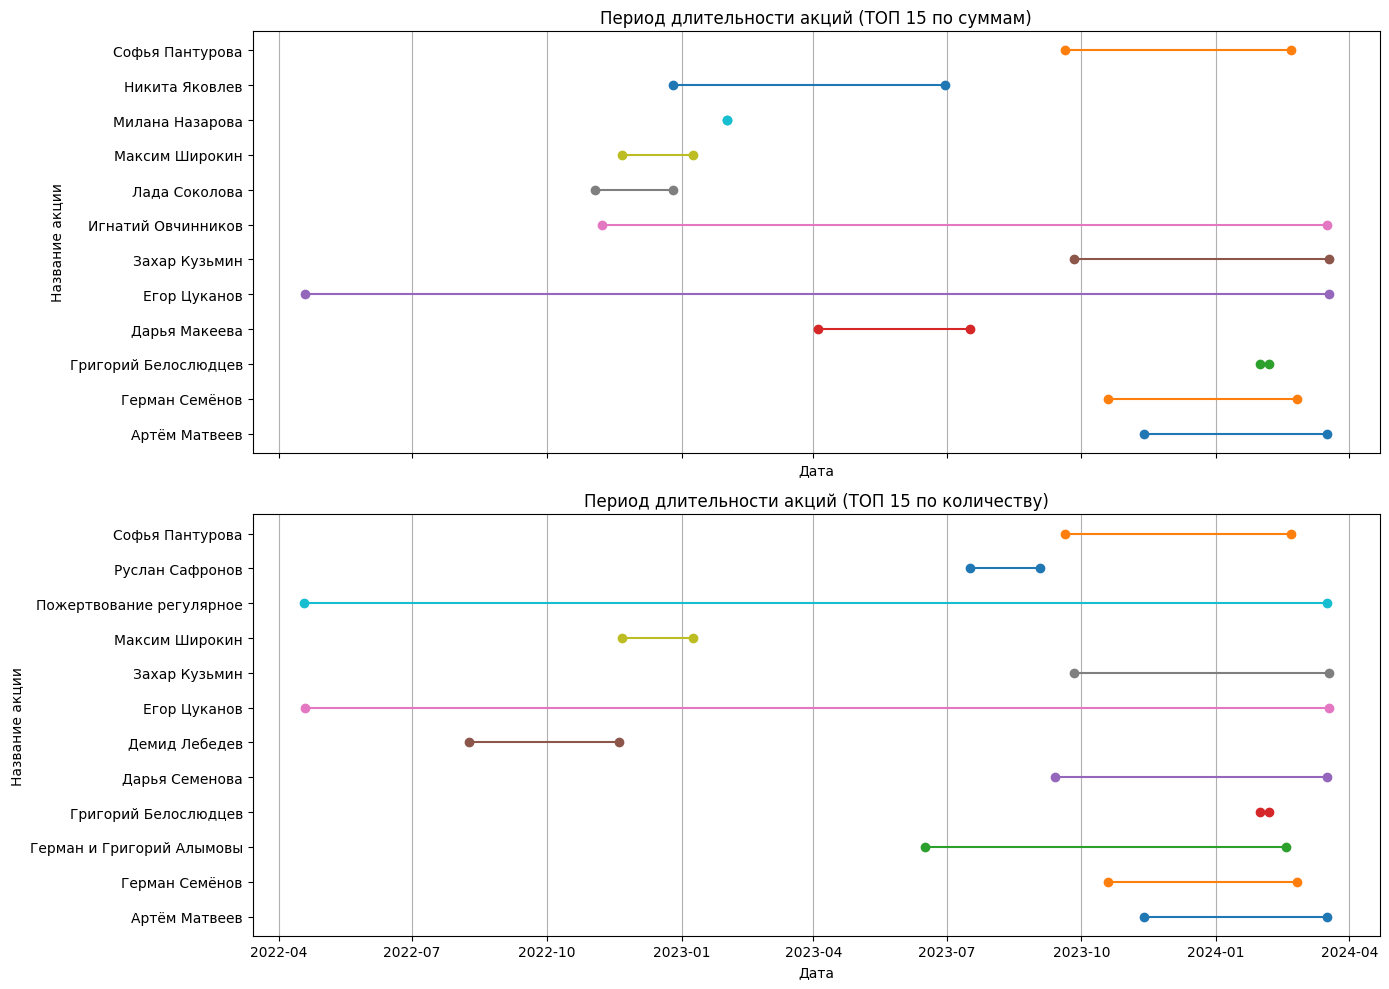

In [63]:
# Группировка данных по product_name и нахождение минимальных и максимальных дат для каждой таблицы
product_intervals_sum = order_period[order_period['product_name'].isin(product_group_sum_top15['product_name'])] \
    .groupby('product_name')['date'].agg(['min', 'max']).reset_index()
product_intervals_count = order_period[order_period['product_name'].isin(product_group_count_top15['product_name'])] \
    .groupby('product_name')['date'].agg(['min', 'max']).reset_index()


fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Первый график для ТОП 15 по суммам
axes[0].set_title('Период длительности акций (ТОП 15 по суммам)')
for idx, row in product_intervals_sum.iterrows():
    axes[0].plot([row['min'], row['max']], [row['product_name'], row['product_name']], marker='o')

axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Название акции')
axes[0].grid(axis='x')
axes[0].tick_params(axis='x')

# Второй график для ТОП 15 по количеству
axes[1].set_title('Период длительности акций (ТОП 15 по количеству)')
for idx, row in product_intervals_count.iterrows():
    axes[1].plot([row['min'], row['max']], [row['product_name'], row['product_name']], marker='o')

axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Название акции')
axes[1].grid(axis='x')
axes[1].tick_params(axis='x')

plt.xticks()

plt.tight_layout()
plt.show()

**Получение периода и вычисление индекса эффективности достижения цели**

In [64]:
filtered_order = order.query('status_id == "Paid"')

product_intervals = filtered_order.groupby('product_name')['date'].agg(['min', 'max']).reset_index()

# Приведение столбцов к правильному типу
product_intervals['max'] = pd.to_datetime(product_intervals['max'])
product_intervals['min'] = pd.to_datetime(product_intervals['min'])
# Вычисление периода события
product_intervals['period'] = (product_intervals['max'] - product_intervals['min']).dt.days

product_intervals.sort_values(by='period').head(3)

,product_name,min,max,period
38,Держимся вместе,2022-05-12,2022-05-12,0
18,Варвара Лукинова,2022-04-08,2022-04-12,4
40,Дмитрий Батраков,2022-04-09,2022-04-14,5


In [65]:
# Собираю ещё одну таблицу с суммой и количеством платежей по акциям.

product_group = filtered_order.groupby('product_name').agg({'order_total_price':'sum', 'order_id': 'count'}) \
.reset_index().rename(columns={'order_id':'count_orders'}).sort_values(by='order_total_price', ascending=False)


product_merged = product_intervals.merge(product_group, on='product_name', how='inner')

In [66]:
# Фильтрую пожертвования без адресов

product_merged = product_merged.query('product_name != "Пожертвование «АиФ. Доброе сердце»" and \
product_name != "Пожертвование" and product_name != "Пожертвование (хочу помочь)" and product_name != "На уставную деятельность"')

**Индекс успешности акции**

Появилось желание создать индекс, который мог бы выделить успешные кейсы. В основу индекса легли такие показатели, как  сумма, период сбора и количетсво платежей по акции. Но сами по себе они не так хорошо, как мне хотелось бы говорили об успешности.

Например если акция быстро закончилась, то это конечно хорошо, но вдруг там просто была очень маленькая сумма.

Я делал это совместно в GPT постепенно улучшая результат. Я не пришёл к идеалу, но постарался избежать грубых ошибок.

Сейчас индекс имеет гибкость. Есть возможность задавать разные веса показателям (количество, сумма, период) и есть коэффициент, который уменьшает вес периода для меньших сумм.

In [67]:
# Логарифмическая нормализация данных
product_merged['period_log_norm'] = (np.log(product_merged['period'] + 1) - \
                                     np.log(product_merged['period'].min() + 1)) / \
                                      (np.log(product_merged['period'].max() + 1) - \
                                       np.log(product_merged['period'].min() + 1))
product_merged['order_total_price_log_norm'] = (np.log(product_merged['order_total_price'] + 1) - \
                                                np.log(product_merged['order_total_price'].min() + 1)) / \
                                                 (np.log(product_merged['order_total_price'].max() + 1) - \
                                                  np.log(product_merged['order_total_price'].min() + 1))
product_merged['count_orders_log_norm'] = (np.log(product_merged['count_orders'] + 1) - \
                                           np.log(product_merged['count_orders'].min() + 1)) / \
                                            (np.log(product_merged['count_orders'].max() + 1) - \
                                             np.log(product_merged['count_orders'].min() + 1))

# Введение корректирующего коэффициента для периода
K = product_merged['order_total_price_log_norm']
product_merged['weighted_period'] = K * (1 - product_merged['period_log_norm'])

# Определение весов (можно настроить по вашему усмотрению)
weights = [0.5, 0.3, 0.2]  # Больше вес для периода, но скорректированного по сумме

# Вычисление индекса эффективности сбора средств
product_merged['effect'] = weights[0] * product_merged['weighted_period'] \
 + weights[1] * product_merged['order_total_price_log_norm'] + weights[2] * product_merged['count_orders_log_norm']

product_merged[['product_name', 'period', 'order_total_price', \
                'count_orders', 'effect']].sort_values(by='effect', ascending=False).head(10)

,product_name,period,order_total_price,count_orders,effect
28,Григорий Белослюдцев,6,1024832,694,0.83
18,Варвара Лукинова,4,488217,340,0.78
82,Ольга Орлова,6,261585,214,0.71
5,Александра Шубина,22,419471,557,0.68
43,Евгений Сынков,18,274432,521,0.67
66,Максим Широкин,49,728945,940,0.67
27,Глеб Пестов,12,165850,303,0.65
95,Сергей Голубков,40,460905,446,0.64
92,Руслан Сафронов,48,439770,709,0.64
14,Артём Матвеев,125,851591,1371,0.62


**Описание Индекса Эффективности Акций**

Мы разработали индекс для оценки эффективности различных акций и предложений вашей компании. Этот индекс учитывает три ключевых показателя:

1. **Период проведения акции** (как долго акция длилась).
2. **Общая сумма заказов** (сколько денег принесла акция).
3. **Количество заказов** (сколько заказов было сделано во время акции).

Чтобы создать справедливую и понятную оценку, мы выполняем несколько шагов.

**Шаги по расчету индекса:**

1. **Логарифмическая нормализация данных**:
   - Мы применяем математическое преобразование (логарифм) к каждому из трёх показателей. Это позволяет уменьшить влияние очень больших или очень маленьких значений и сделать данные более сопоставимыми.
   - Далее, мы нормализуем эти значения, чтобы они лежали в диапазоне от 0 до 1. Нормализация помогает нам сравнивать разные акции на одинаковой основе.

2. **Корректировка периода**:
   - Мы корректируем показатель периода с учетом общей суммы заказов. Это означает, что более успешные акции (по сумме заказов) получают дополнительный "вес" при оценке продолжительности.
   - Например, если акция принесла много денег, её продолжительность будет считаться более значимой в нашем индексе.

3. **Определение весов для каждого показателя**:
   - Мы задаём веса для каждого из трёх показателей. В нашем случае, веса распределены следующим образом:
     - 50% для скорректированного периода.
     - 30% для общей суммы заказов.
     - 20% для количества заказов.
   - Эти веса можно настроить по вашему усмотрению, чтобы лучше соответствовать вашим бизнес-целям.

4. **Расчет итогового индекса эффективности**:
   - Мы складываем скорректированные значения показателей, умноженные на их веса. Полученный результат — это и есть наш индекс эффективности.
   - Чем выше индекс, тем эффективнее была акция с точки зрения её продолжительности, суммы заказов и количества заказов.

**ПОЯСНЕНИЕ:**

- Не всегда акция успешна, если она быстро закончислась или имела много платежей
- Этот индекс позволяет легко сравнивать разные акции и определять, какие из них были наиболее успешными по совокупности параметров.

---

Таким образом, индекс эффективности помогает понять какие акции действительно привлекали доноров смягчая влияние выбросов.

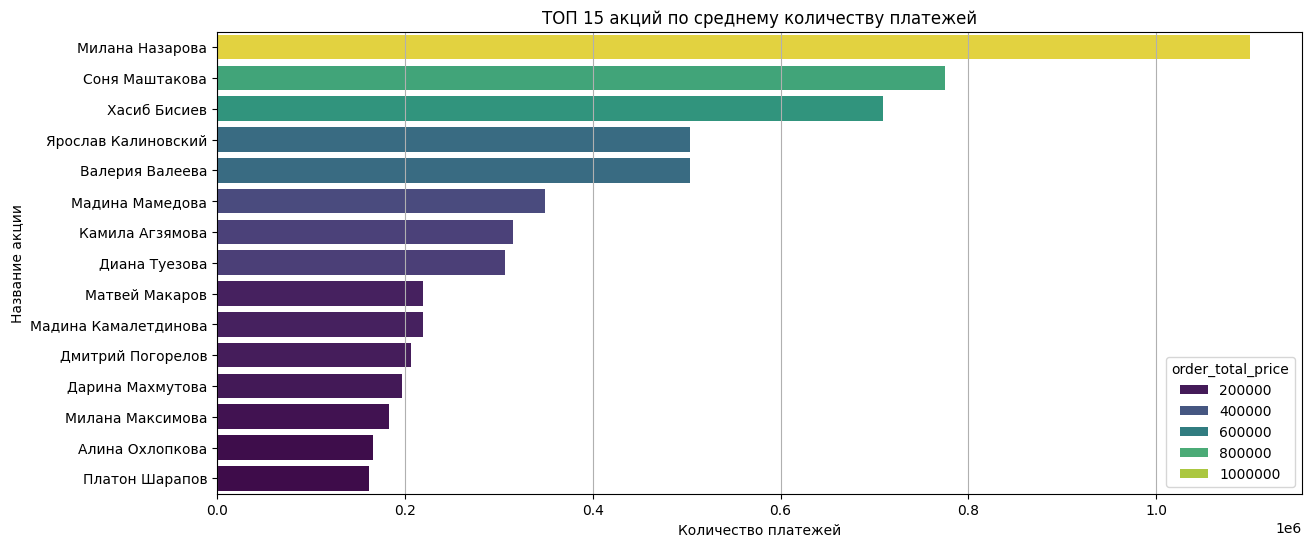

In [68]:
plt.figure(figsize=(14, 6))
sns.barplot(data=product_group_mean, x='order_total_price', y='product_name', hue='order_total_price', palette='viridis')
plt.title('ТОП 15 акций по среднему количеству платежей')
plt.xlabel('Количество платежей')
plt.ylabel('Название акции')
plt.grid(axis='x')
plt.show()

Индекс выглядит адекватным, но каждый успешный пост нужно просматривать глазами и далее вносить корректировки в индекс, если он где-то врёт. Например сейчас видно, что он хорошо оценивает акции где сумма средняя и выше с не большим периодом сбора.

Тут сразу два допущения:

1. Промежуток между первой оплатой последней по акции - это период акции.
2. Акция заканчивается после последнего платежа по ней.

In [69]:
# Сохраняю в переменную топ 7 кейсов по индексу

top_effect = product_merged[['product_name', 'period', 'order_total_price', \
                             'count_orders', 'effect']].sort_values(by='effect', ascending=False).head(10)

# Фильтрую таблицу с заказами на основе топ 10 акций
order_top_effect = filtered_order[filtered_order['product_name'].isin(top_effect['product_name'])]


**Корреляция периода, суммы сбора и количества платежей по акциям**

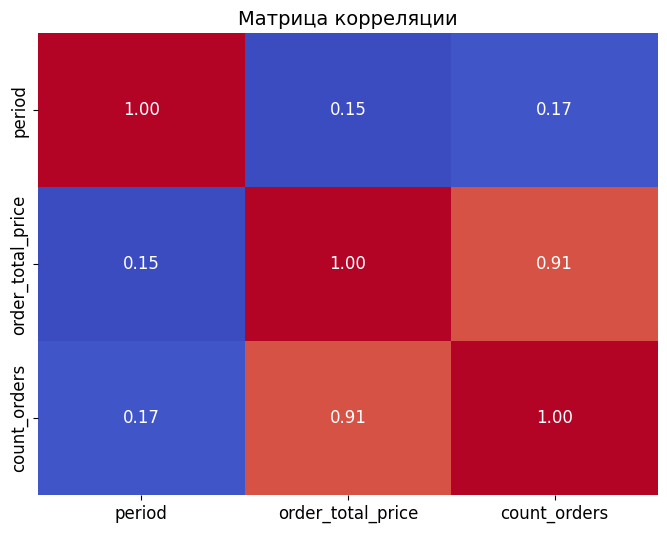

In [70]:
# Сначала выберем только нужные столбцы
selected_columns = product_merged[['period', 'order_total_price', 'count_orders']]

# Затем построим матрицу корреляции
correlation_matrix = selected_columns.corr()

# Создаем тепловую карту с помощью seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, cbar=False)
plt.title('Матрица корреляции', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Каналы привлечения

**Общая эффективность каналов**

**Используется следующая формула:**
*`Процент эффективности` = `количество доноров (первое касаение)` / `общее количество доноров, которе реагирует на канал.`*

In [71]:
# Считаю общее количество активностей по каждому каналу привлечения группирую данные по channel_id

channels_group2 = channels.groupby('channel_id').agg({'user_id': 'count'}). \
reset_index().sort_values(by='user_id', ascending=False).rename(columns={'user_id': 'count_total'})

# Объединяю таблицу с общим количеством активности и первыми касаниями
merged_channels = pd.merge(channels_group, channels_group2, on='channel_id')

# Вычисляю процент, который показывает на сколько эффективен канал в целом. На сколько каждый канал "заставляет" донора активничать

merged_channels['percent_effective'] = merged_channels['count_first'] / merged_channels['count_total'] * 100
merged_channels = merged_channels.sort_values(by='percent_effective', ascending=False)


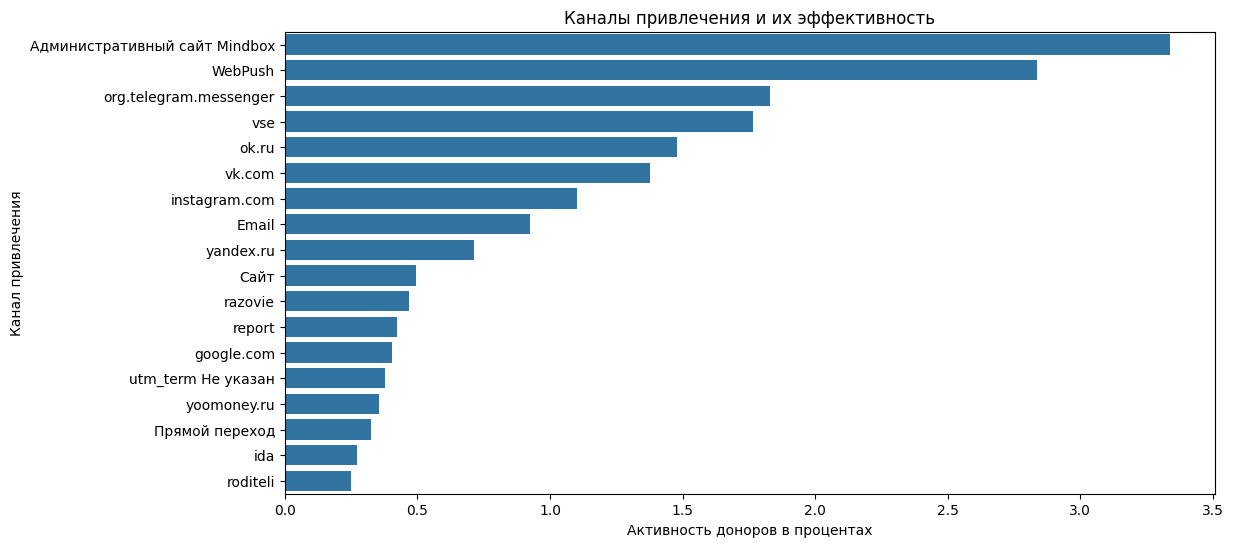

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_channels, x='percent_effective', y='channel_id')
plt.title('Каналы привлечения и их эффективность')
plt.xlabel('Активность доноров в процентах')
plt.ylabel('Канал привлечения')
plt.xticks()
plt.show()

**Динамика эффективности каналов**

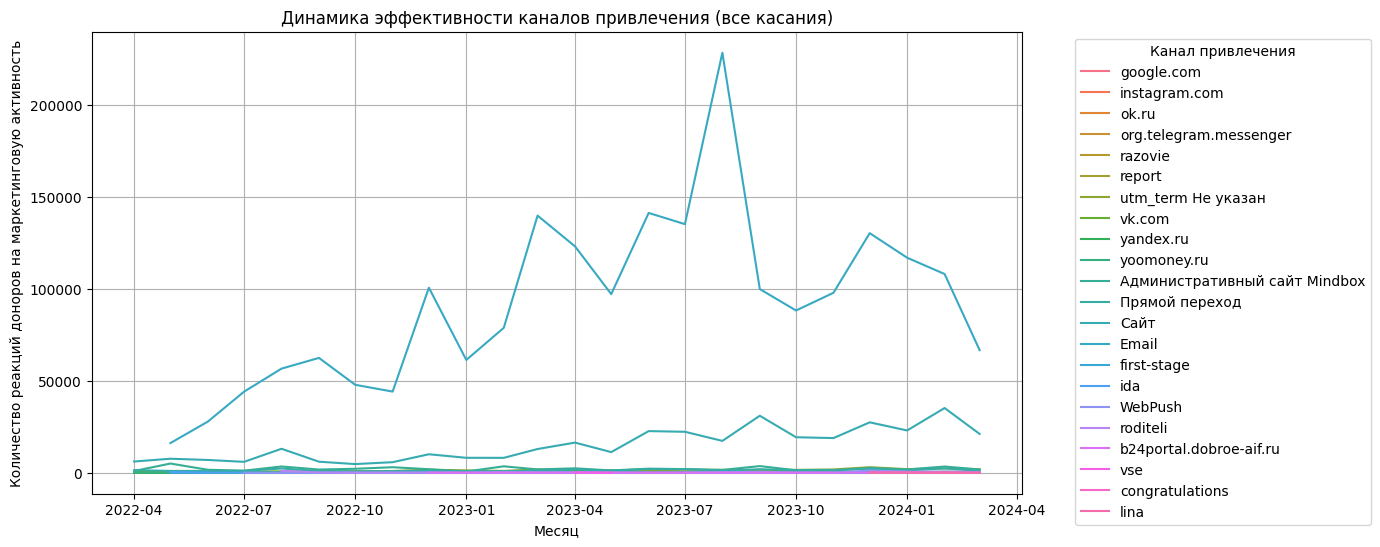

In [73]:
# Группировка данных по дате и каналу с подсчетом user_id
channels_dinamic_all = channels.groupby(['month', 'channel_id']).agg({'user_id': 'count'}).reset_index()

# Переименование столбца user_id для ясности
channels_dinamic_all.rename(columns={'user_id': 'count_users'}, inplace=True)

# Преобразование столбца month обратно в datetime для правильного отображения на графике
channels_dinamic_all['month'] = channels_dinamic_all['month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.set_palette(palette)
sns.lineplot(data=channels_dinamic_all, x='month', y='count_users', hue='channel_id')


plt.title('Динамика эффективности каналов привлечения (все касания)')
plt.xlabel('Месяц')
plt.ylabel('Количество реакций доноров на маркетинговую активность')
plt.legend(title='Канал привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

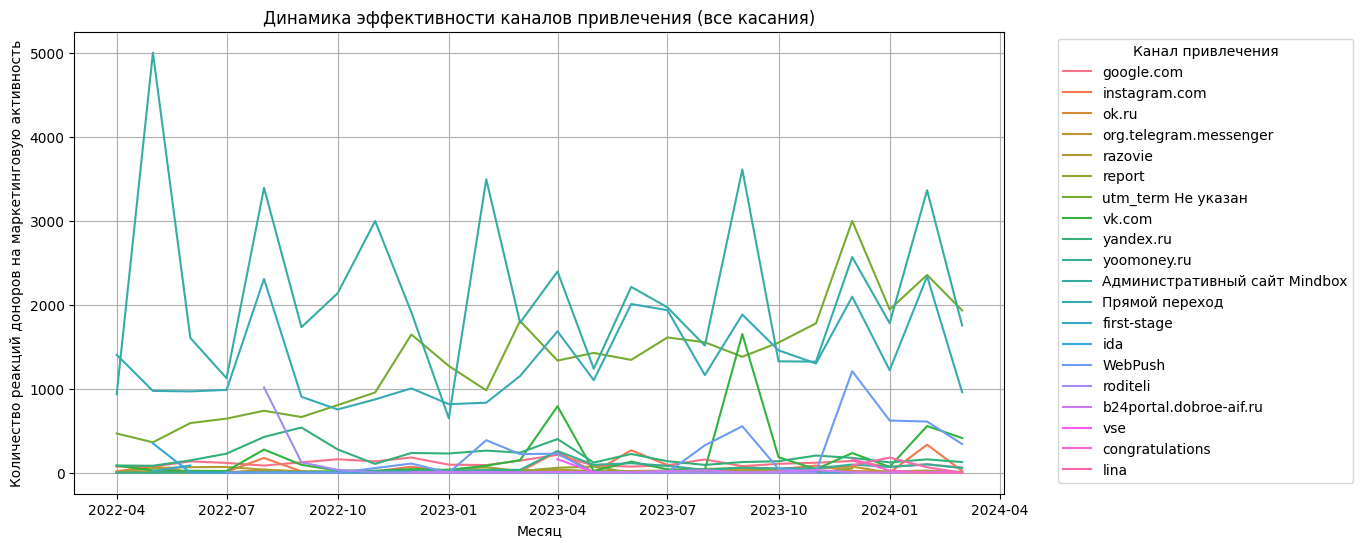

In [74]:

# Убираю сайт и email
channels_dinamic_all_f = channels_dinamic_all.query('channel_id != "Сайт" and channel_id != "Email"')

plt.figure(figsize=(12, 6))
sns.set_palette(palette)
sns.lineplot(data=channels_dinamic_all_f, x='month', y='count_users', hue='channel_id')
plt.title('Динамика эффективности каналов привлечения (все касания)')
plt.xlabel('Месяц')
plt.ylabel('Количество реакций доноров на маркетинговую активность')
plt.legend(title='Канал привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Общая динамика по всем каналам сразу**

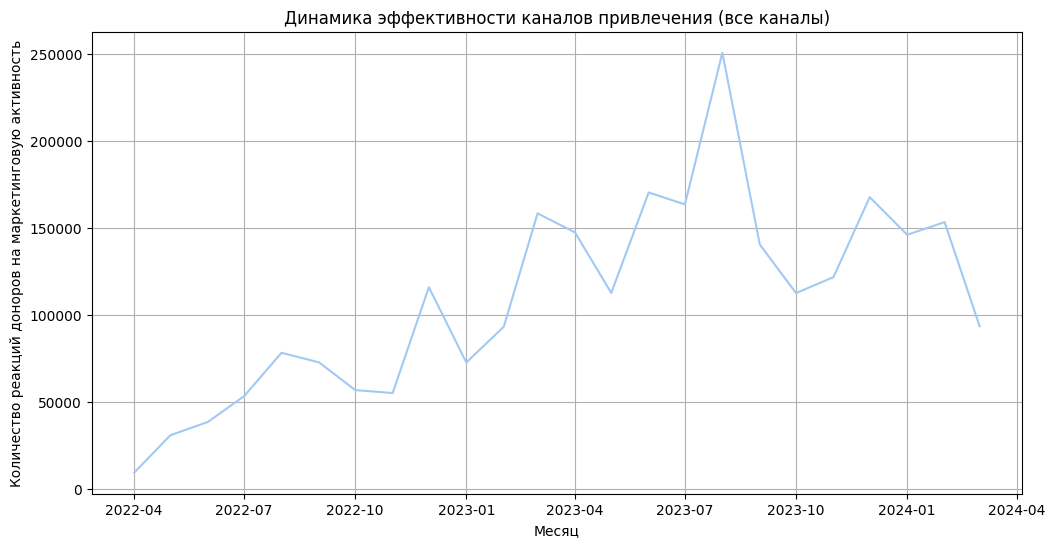

In [75]:
total_channels = channels_dinamic_all.groupby('month').agg({'count_users': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.set_palette(palette)
sns.lineplot(data=total_channels, x='month', y='count_users')
plt.title('Динамика эффективности каналов привлечения (все каналы)')
plt.xlabel('Месяц')
plt.ylabel('Количество реакций доноров на маркетинговую активность')
plt.grid(True)
plt.show()

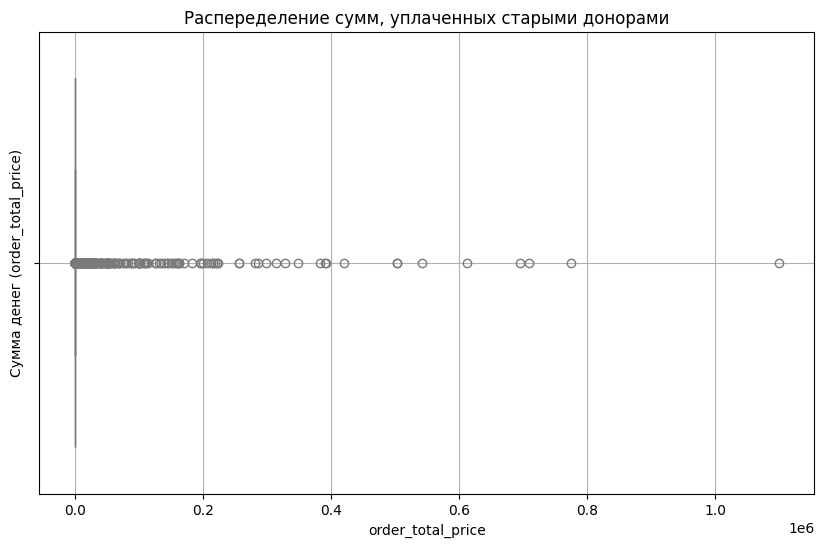

In [76]:
# Распределение по суммам донатов

plt.figure(figsize=(10, 6))
sns.boxplot(x=order['order_total_price'])
plt.title('Распеределение сумм, уплаченных старыми донорами')
plt.ylabel('Сумма денег (order_total_price)')
plt.grid(True)
plt.show()

**Топ по пожертвованиям**

In [77]:
# Оставляем только успешные платежи.

top_order = order.query('status_id == "Paid"')

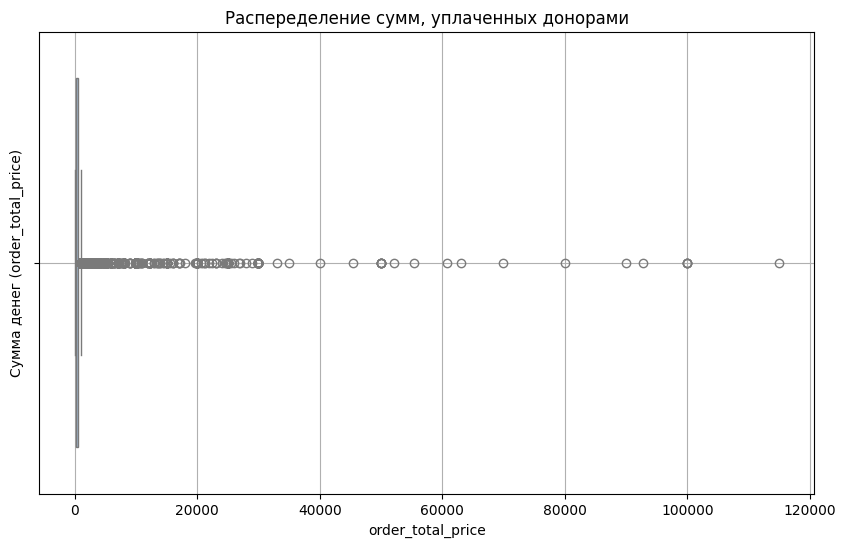

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=top_order['order_total_price'])
plt.title('Распеределение сумм, уплаченных донорами')
plt.ylabel('Сумма денег (order_total_price)')
plt.grid(True)
plt.show()

В данном случае, мы видим много выбросов. Далее нам нужно будет определить ТОП доноров и конкретно в этом случае я не буду торопиться чистить выбросы. Мы их почистим в других разделах исследования.

In [79]:
# Замена нулевых значений в столбце order_total_price
order.loc[order['order_total_price'] == 0, 'order_total_price'] = order['price_of_Line']

In [80]:
# Фильтрация данных
# Филльтру около 600 строк, где по не ясным причинам нулевые суммы платежей при статусе "paid"
order = order.query('not (status_id == "Paid" & order_total_price == 0 or price_of_Line == 0)')

In [81]:
# Группировка доноров по сумме платежа и количества платежей

top_order_group_sum = top_order.groupby('user_id').agg({'order_total_price':'sum'}).reset_index(). \
rename(columns={'order_total_price' :'total_paid'}).sort_values(by='total_paid' , ascending=False)

top_order_group_quantity = top_order.groupby('user_id').agg({'order_id': 'count'}).reset_index(). \
rename(columns={'order_id': 'quantity'}).sort_values(by='quantity', ascending=False)

In [82]:
# Фильтруем таблицу по ТОП 15 по сумме за всё время
top_15_money = top_order_group_sum.head(15)
top_15_quantity = top_order_group_quantity.head(15)

# На основе таблицы находим самих доноров, которые входят в ТОП 15 для их ближайшего рассмотрения
top_15_money_users = id_donor[id_donor['user_id'].isin(top_15_money['user_id'])]

top_15_quantity_users = id_donor[id_donor['user_id'].isin(top_15_quantity['user_id'])]

# На экран
top_15_money.head()

,user_id,total_paid
6976,35099,1072500
6975,35098,556600
4480,31114,328000
5876,33283,325000
5153,32026,246200


In [83]:
top_15_quantity.head()

,user_id,quantity
1170,22683,148
8995,38457,132
1912,25737,130
5832,33202,105
452,17488,94


In [84]:
# Каналы привлечения ТОП 15 доноров по суммам.

channels_top_15 = channels[channels['user_id'].isin(top_15_money['user_id'])]. \
groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'}).reset_index()

# Каналы привлечения ТОП 15 доноров по количеству платежей

channels_top_15_2 = channels[channels['user_id'].isin(top_15_quantity['user_id'])]. \
groupby('user_id').agg({'action_date': 'min', 'channel_id': 'first'}).reset_index()



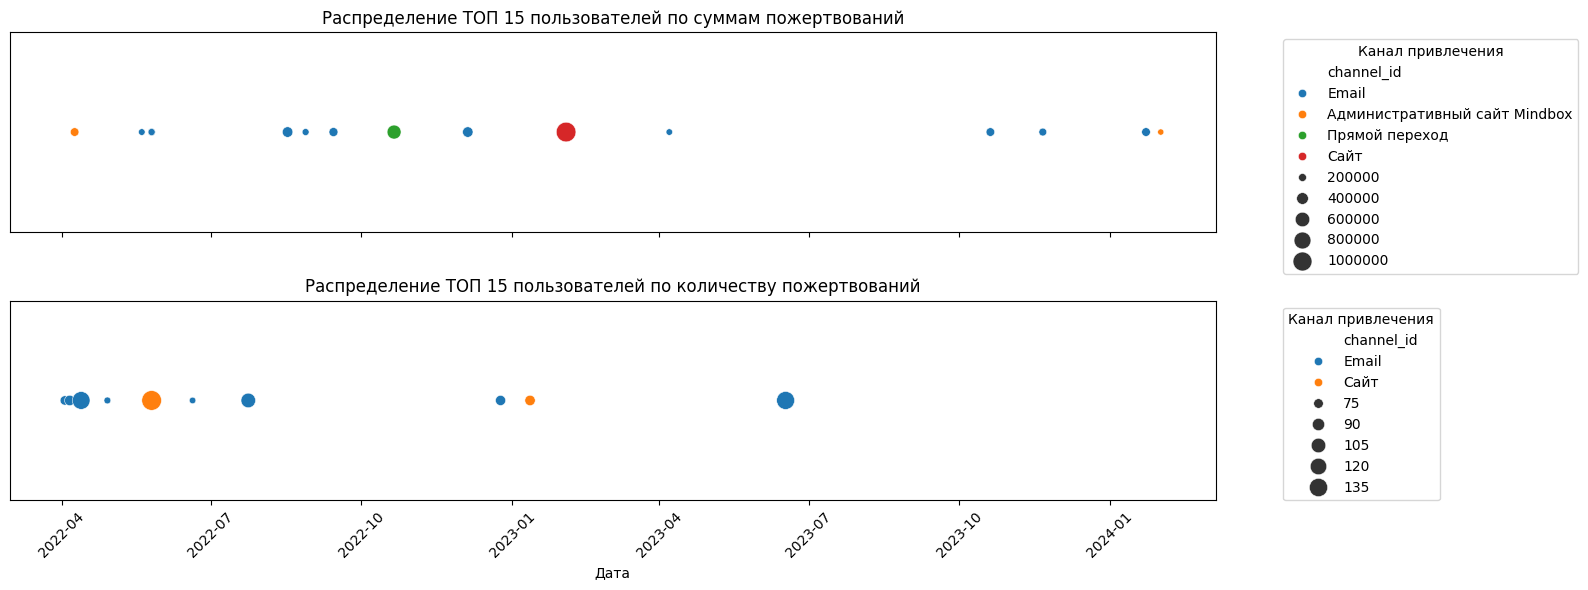

In [85]:
# Определяем диапазон дат
start_date = pd.to_datetime('2020-04-01')
end_date = pd.to_datetime('2024-03-01')

# Фильтрация данных по диапазону дат
filtered_data_1 = channels_top_15[(channels_top_15['action_date'] >= start_date) &
                                  (channels_top_15['action_date'] <= end_date)]
filtered_data_2 = channels_top_15_2[(channels_top_15_2['action_date'] >= start_date) &
                                    (channels_top_15_2['action_date'] <= end_date)]

# Добавляю к итоговой таблице данные о сумме платежей по донору и количеству платежей total_paid и quantity
filtered_data_1 = filtered_data_1.merge(top_15_money, on='user_id', how='left')
filtered_data_2 = filtered_data_2.merge(top_15_quantity, on='user_id', how='left')

# Создание фигуры и осей для двух графиков
fig, axes = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

# Первый график
scatter1 = sns.scatterplot(data=filtered_data_1, x='action_date', y=[1]*len(filtered_data_1), hue='channel_id',
                           size='total_paid', sizes=(20, 200), palette='tab10', ax=axes[0])
axes[0].set_title('Распределение ТОП 15 пользователей по суммам пожертвований')
axes[0].set_ylabel('')
axes[0].set_yticks([])

# Удаляем легенду для размера точек
h, l = axes[0].get_legend_handles_labels()
new_labels = [label for label in l if 'total_paid' not in label]
new_handles = [handle for handle, label in zip(h, l) if 'total_paid' not in label]
axes[0].legend(new_handles, new_labels, title='Канал привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')

# Второй график
scatter2 = sns.scatterplot(data=filtered_data_2, x='action_date', y=[1]*len(filtered_data_2), hue='channel_id',
                           size='quantity', sizes=(20, 200), palette='tab10', ax=axes[1])
axes[1].set_title('Распределение ТОП 15 пользователей по количеству пожертвований')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('')
axes[1].set_yticks([])

# Удаляем легенду для размера точек
h, l = axes[1].get_legend_handles_labels()
new_labels = [label for label in l if 'quantity' not in label]
new_handles = [handle for handle, label in zip(h, l) if 'quantity' not in label]
axes[1].legend(new_handles, new_labels, title='Канал привлечения', bbox_to_anchor=(1.05, 1), loc='upper left')

# Настройка графика
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На первой временной шкале видно топ 15 доноров и моменты их появления покрашенные в цвета канала привлечения.

На втором графике информация о том, когда пришли и с какого канала ТОП 15 доноров по количеству платежей.

### Суммы и платежи

In [86]:
order_group = order.query('status_id == "Paid" or order_total_price > 1 or user_id ! = 43457')


order_group = order_group.groupby('user_id').agg({'order_total_price':'sum', 'order_id': 'count'}).reset_index(). \
rename(columns={'order_total_price' :'total_paid', 'order_id': 'quantity'}).sort_values(by=['total_paid','quantity'] , ascending=False)

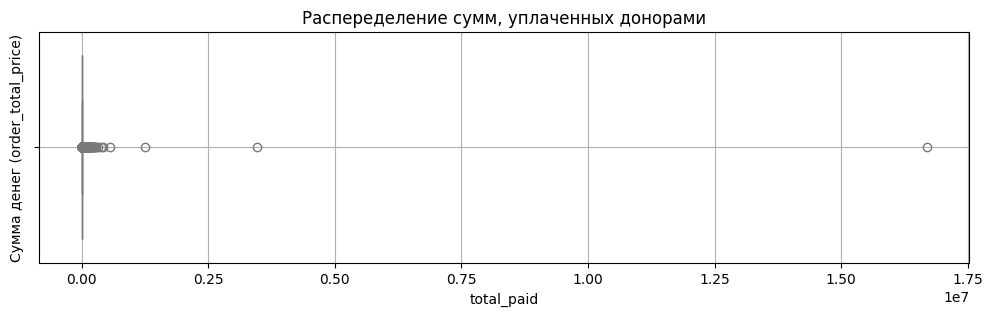

In [87]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=order_group['total_paid'])
plt.title('Распеределение сумм, уплаченных донорами')
plt.ylabel('Сумма денег (order_total_price)')
plt.grid(True)
plt.show()

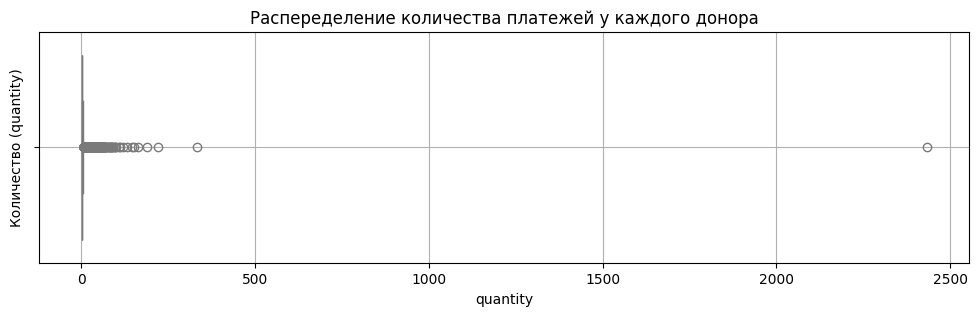

In [88]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=order_group['quantity'])
plt.title('Распеределение количества платежей у каждого донора')
plt.ylabel('Количество (quantity)')
plt.grid(True)
plt.show()

Нам очень интересны топовые доноры, но было принято решение отфильтровать таблицу `order` для дальнейших исследований.

In [89]:
# # Определение значения 90-го процентиля
percentile_90 = order['order_total_price'].quantile(0.90)
order = order[order['order_total_price'] <= percentile_90]

**Динамика количества и сумм пожертвований по месяцам**

In [90]:

# Группировка данных по дате и каналу с подсчетом сумм донатов
order_dinamic = order.groupby(['month']).agg({'order_total_price': 'sum', 'quantity': 'sum'}) \
.reset_index().rename(columns={'order_total_price': 'sum_orders', 'quantity': 'count_orders'})

# Преобразование столбца month обратно в datetime для правильного отображения на графике
order_dinamic['month'] = order_dinamic['month'].dt.to_timestamp()

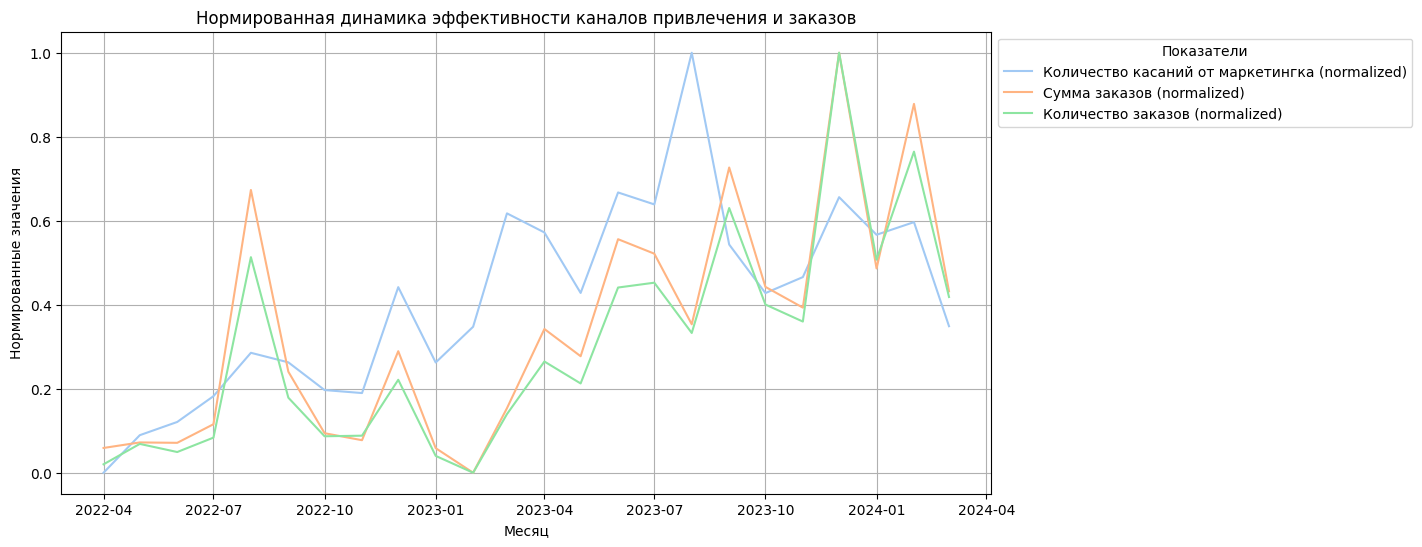

In [91]:
# Нормализация данных
total_channels['count_users_norm'] = (total_channels['count_users'] - \
                                      total_channels['count_users'].min()) / (total_channels['count_users'].max() - total_channels['count_users'].min())
order_dinamic['sum_orders_norm'] = (order_dinamic['sum_orders'] - \
                                    order_dinamic['sum_orders'].min()) / (order_dinamic['sum_orders'].max() - order_dinamic['sum_orders'].min())
order_dinamic['count_orders_norm'] = (order_dinamic['count_orders'] - \
                                      order_dinamic['count_orders'].min()) / (order_dinamic['count_orders'].max() - order_dinamic['count_orders'].min())

plt.figure(figsize=(12, 6))
sns.set_palette(palette)

# Линия для нормированных count_users
sns.lineplot(data=total_channels, x='month', y='count_users_norm', label='Количество касаний от маркетингка (normalized)')

# Линия для нормированных sum_orders
sns.lineplot(data=order_dinamic, x='month', y='sum_orders_norm', label='Сумма заказов (normalized)')

# Линия для нормированных count_orders
sns.lineplot(data=order_dinamic, x='month', y='count_orders_norm', label='Количество заказов (normalized)')

# Настройка графика
plt.title('Нормированная динамика эффективности каналов привлечения и заказов')
plt.xlabel('Месяц')
plt.ylabel('Нормированные значения')
plt.legend(title='Показатели', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**Без рекурента**

In [92]:
# Фильтрую таблицу с заказами и каналами привлечения так, чтобы остались только доноры не на подписке.

order_not_rec = order[order['recurrent'] == False]
not_rec = id_donor[id_donor['recurrent'] == False]
channels_not_rec = channels[channels['user_id'].isin(not_rec['user_id'])]

# Группировка данных по дате и каналу с подсчетом user_id
channels_not_rec_dinamic_all = channels_not_rec.groupby(['month', 'channel_id']). \
agg({'user_id': 'count'}).reset_index()

total_channels_not_rec = channels_not_rec_dinamic_all.groupby('month'). \
agg({'user_id': 'sum'}).reset_index().rename(columns={'user_id': 'count_users'})

In [93]:

# Группировка данных по дате и каналу с подсчетом сумм донатов
order_dinamic_not_rec = order_not_rec.groupby(['month']) \
.agg({'order_total_price': 'sum', 'quantity': 'sum'}) \
.reset_index().rename(columns={'order_total_price': 'sum_orders', 'quantity': 'count_orders'})

# Преобразование столбца month обратно в datetime для правильного отображения на графике
order_dinamic_not_rec['month'] = order_dinamic_not_rec['month'].dt.to_timestamp()


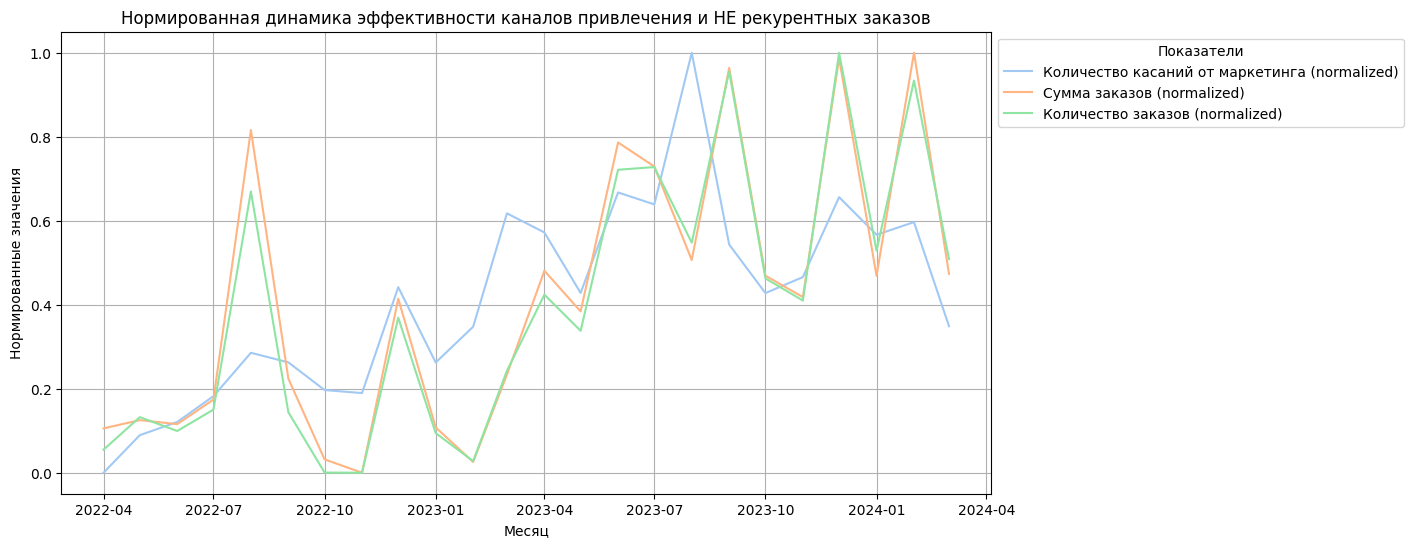

In [94]:
# Нормализация данных
total_channels_not_rec['count_users_norm'] = (total_channels_not_rec['count_users'] - \
                                    total_channels_not_rec['count_users'].min()) / (total_channels_not_rec['count_users']. \
                                    max() - total_channels_not_rec['count_users'].min())
order_dinamic_not_rec['sum_orders_norm'] = (order_dinamic_not_rec['sum_orders'] - \
                                    order_dinamic_not_rec['sum_orders'].min()) / (order_dinamic_not_rec['sum_orders']. \
                                    max() - order_dinamic_not_rec['sum_orders'].min())
order_dinamic_not_rec['count_orders_norm'] = (order_dinamic_not_rec['count_orders'] - \
                                    order_dinamic_not_rec['count_orders'].min()) / (order_dinamic_not_rec['count_orders']. \
                                    max() - order_dinamic_not_rec['count_orders'].min())


plt.figure(figsize=(12, 6))
sns.set_palette(palette)

# Линия для нормированных count_users
sns.lineplot(data=total_channels, x='month', y='count_users_norm', label='Количество касаний от маркетинга (normalized)')

# Линия для нормированных sum_orders
sns.lineplot(data=order_dinamic_not_rec, x='month', y='sum_orders_norm', label='Сумма заказов (normalized)')

# Линия для нормированных count_orders
sns.lineplot(data=order_dinamic_not_rec, x='month', y='count_orders_norm', label='Количество заказов (normalized)')

# Настройка графика
plt.title('Нормированная динамика эффективности каналов привлечения и НЕ рекурентных заказов')
plt.xlabel('Месяц')
plt.ylabel('Нормированные значения')
plt.legend(title='Показатели', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [95]:
# Группировка данных по дням и вычисление суммы заказов на каждый день
daily_orders = order.groupby('date')['order_total_price'].sum().reset_index()

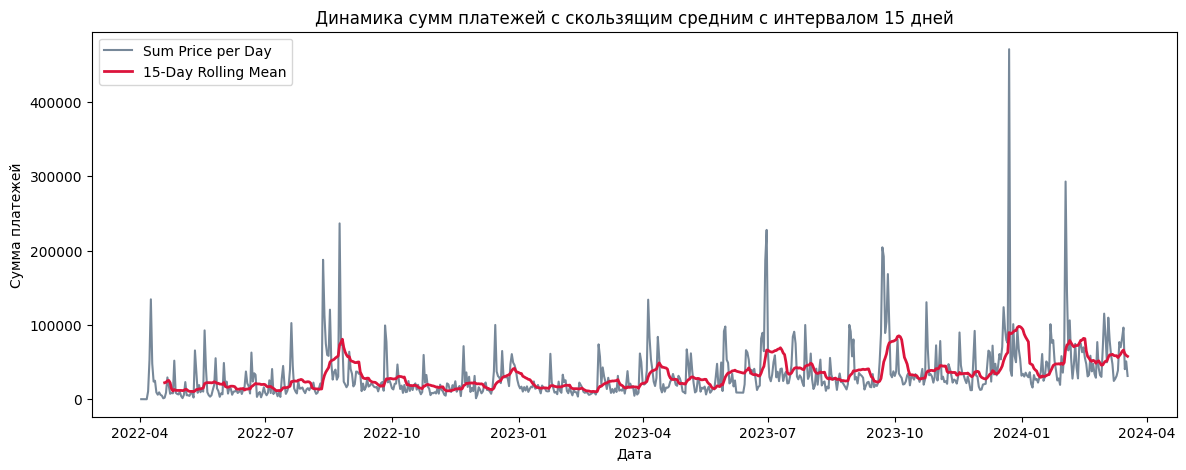

In [96]:
# Вычисляем скользящее среднее
daily_orders['rolling_mean'] = daily_orders['order_total_price'].rolling(window=15).mean()
plt.figure(figsize=(14, 5))
# График суммы заказов по дням
plt.plot(daily_orders['date'], daily_orders['order_total_price'], label='Sum Price per Day', color='lightslategrey')
# График скользящего среднего
plt.plot(daily_orders['date'], daily_orders['rolling_mean'], label='15-Day Rolling Mean', color='crimson', linewidth=2)
plt.xlabel('Дата')
plt.ylabel('Сумма платежей')
plt.legend(loc='upper left')
plt.title('Динамика сумм платежей с скользящим средним с интервалом 15 дней')
plt.show()

**Распределение доноров по типу платежа (подписка/без подписки)**

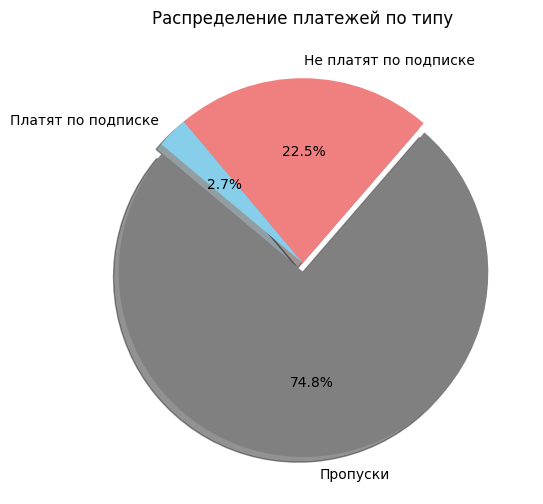

In [97]:
# Подсчет количества уникальных значений в столбце status_id
status_counts = id_donor['recurrent'].value_counts(dropna=False)

# Метки для круговой диаграммы
labels = ['Пропуски', 'Не платят по подписке', 'Платят по подписке']

# Размеры каждого сектора
sizes = status_counts.values

# Цвета для каждого сектора
colors = ['grey', 'lightcoral', 'skyblue']

# Опционально можно выделить первый сектор
explode = [0.05] + [0] * (len(status_counts) - 1)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Распределение платежей по типу')
plt.show()

**Распределение количества донатов и их сумм по дням недели**

In [98]:
# Преобразование столбца с датами в номер недели
order['week'] = order['date_time'].dt.isocalendar().week

# Группировка данных по неделям и дням недели, вычисление количества платежей для каждого дня
order_grouped = order.groupby(['week', 'day_of_week'])['order_id'].count().reset_index()

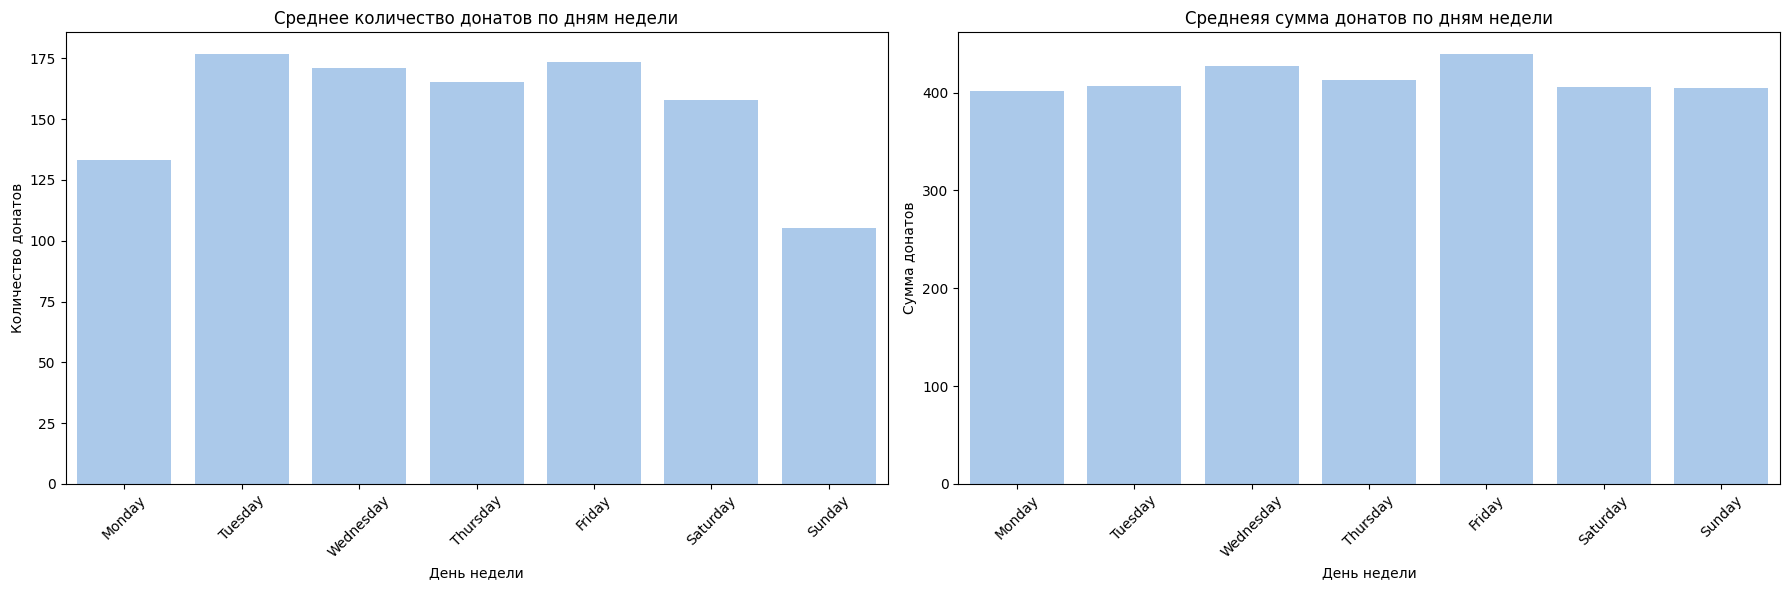

In [99]:
# Группировка данных
order_mean_by_day = order_grouped.groupby('day_of_week')['order_id'] \
        .mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
order_sum_by_day = order.groupby('day_of_week')['order_total_price'] \
        .mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# График среднего количества донатов по дням недели
sns.barplot(x=order_mean_by_day.index, y=order_mean_by_day.values, ax=axes[0])
axes[0].set_title('Среднее количество донатов по дням недели')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество донатов')
axes[0].tick_params(axis='x', rotation=45)

# График средней суммы донатов по дням недели
sns.barplot(x=order_sum_by_day.index, y=order_sum_by_day.values, ax=axes[1])
axes[1].set_title('Среднеяя сумма донатов по дням недели')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('Сумма донатов')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

По воскресениям приходит в среднем меньше донатов.

Суммы же донатов распределены равномерно по всем дням.

**Распеределени количества донатов и их сумм по времени в течении дня**

In [100]:
# Группировка данных по неделям и времени суток, вычисление количества платежей для каждого дня
order_grouped = order.groupby(['week', 'hour_of_day'])['order_id'].count().reset_index()

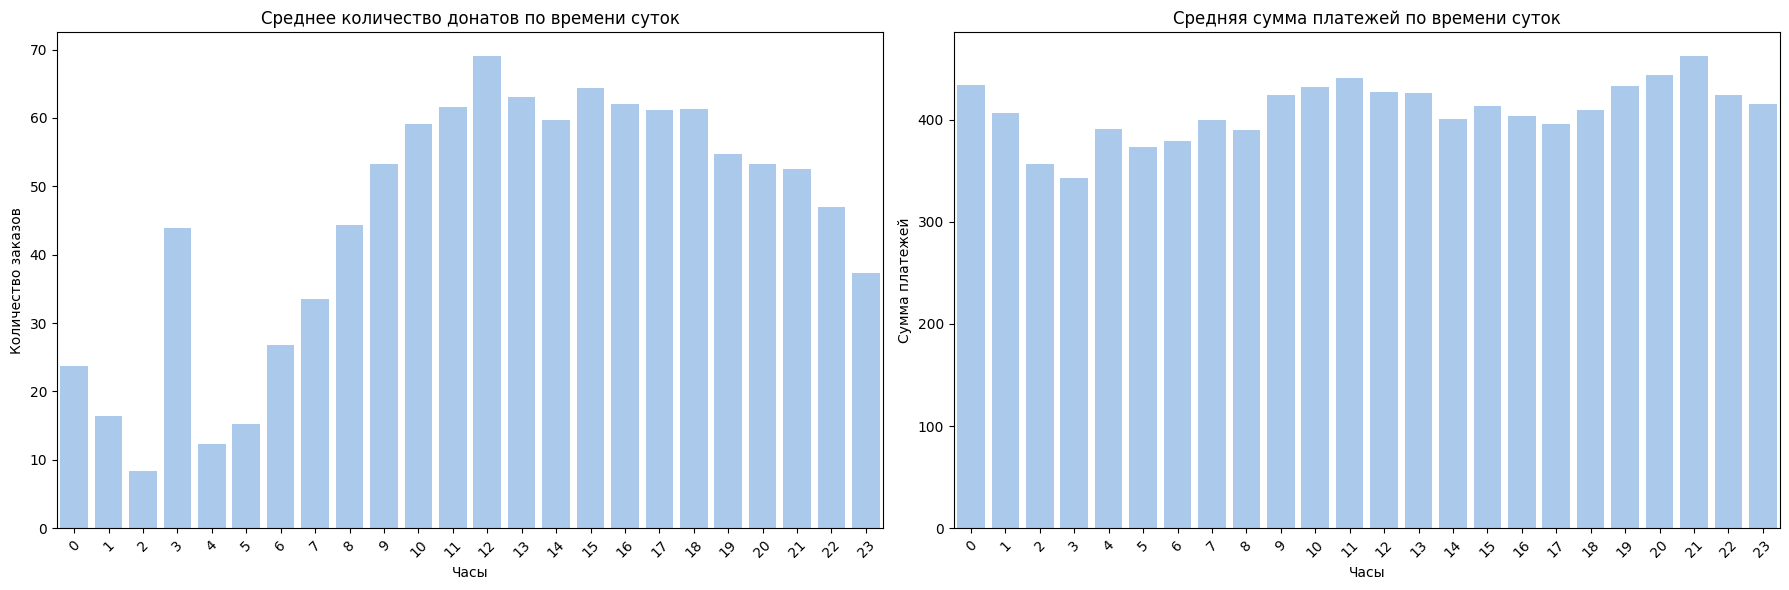

In [101]:
# Группировка данных
order_mean_by_hour = order_grouped.groupby('hour_of_day')['order_id'].mean().reset_index().sort_values(by='hour_of_day')
order_sum_by_hour = order.groupby('hour_of_day')['order_total_price'].mean().reset_index().sort_values(by='hour_of_day')

# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# График количества платежей по дням недели
sns.barplot(x=order_mean_by_hour['hour_of_day'], y=order_mean_by_hour['order_id'], ax=axes[0])
axes[0].set_title('Среднее количество донатов по времени суток')
axes[0].set_xlabel('Часы')
axes[0].set_ylabel('Количество заказов')
axes[0].tick_params(axis='x', rotation=45)

# График суммы платежей по дням недели
sns.barplot(x=order_sum_by_hour['hour_of_day'], y=order_sum_by_hour['order_total_price'], ax=axes[1])
axes[1].set_title('Средняя сумма платежей по времени суток')
axes[1].set_xlabel('Часы')
axes[1].set_ylabel('Сумма платежей')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Логично, что в ночное время количество донатов меньше. Да, мы знаем, что имеем данные с раных часовых поясов, но большинство благотворителей находятся +-3 часа от Московского часового пояса.

**Статусы самих платежей, как поиск точек роста**

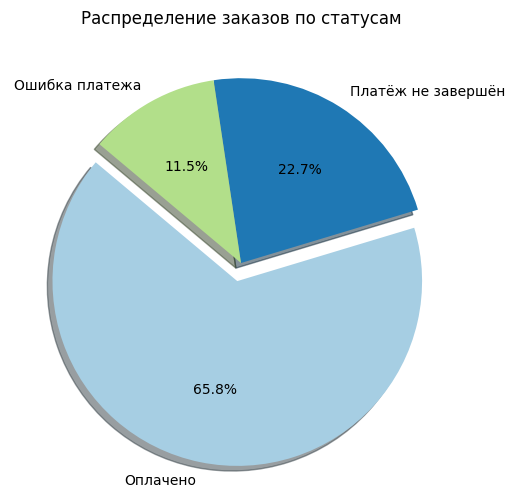

In [102]:
# Подсчет количества уникальных значений в столбце status_id
status_counts = order['status_id'].value_counts()

# Метки для круговой диаграммы
labels = ['Оплачено', 'Платёж не завершён', 'Ошибка платежа']
# Размеры каждого сектора
sizes = status_counts.values

# Цвета для каждого сектора
colors = plt.cm.Paired(range(len(status_counts)))

# Опционально можно выделить первый сектор
explode = [0.1] + [0] * (len(status_counts) - 1)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Распределение заказов по статусам')
plt.show()

Важно отметить, что только 65.8% попыток оплаты заканчиваются успехом. Стоит взять это на вооурежние и попробовать изменить показатель в лучшую сторону.

 ## RFM

- **Recency (R)** — как давно донор совершал пожертвование.
- **Frequency (F)** — как часто донор совершает пожертвования.
- **Monetary (M)** — сколько денег донор тратит на пожертвования.

**Цель RFM-анализа** — сегментировать клиентов для понимания их поведения и определения лучших стратегий для взаимодействия с ними.

In [103]:
order_rmf = order.query('status_id == "Paid"')
order_rmf = order.query('order_total_price > 0')

In [104]:
order_rmf['date_time'] = order_rmf['date_time'].dt.date

Дату анализа выставлю максимальную дату в датасете + 1 день

In [105]:
work_date = order_rmf.date_time.max() + pd.Timedelta('1d')

Создаю RFM таблицу: количество оплат доноров, сумма пожервований и даты жизни донора: минимальная и максимальная даты

In [106]:
rfm = order_rmf.groupby('user_id').agg({'order_id': 'count',
                                     'order_total_price': 'sum',
                                     'date_time': ['min', 'max']}).reset_index()

In [107]:
rfm.columns = ['user_id', 'orders_count', 'm_value', 'start_date', 'end_date']

Период жизни клиента - разница между конечной и начальной датой

In [108]:
rfm['period'] = (rfm.end_date - rfm.start_date) / pd.Timedelta('1d') + 1

In [109]:
rfm['r_value'] = (work_date - rfm.end_date) / pd.Timedelta('1d')

**Frequency (F)**

In [110]:
# Расчёт Frequency. За период взят месяц (30 дней)

rfm['period_months'] = rfm['period'] / 30.44  # Среднее количество дней в месяце
rfm['f_value'] = rfm['orders_count'] / rfm['period_months']

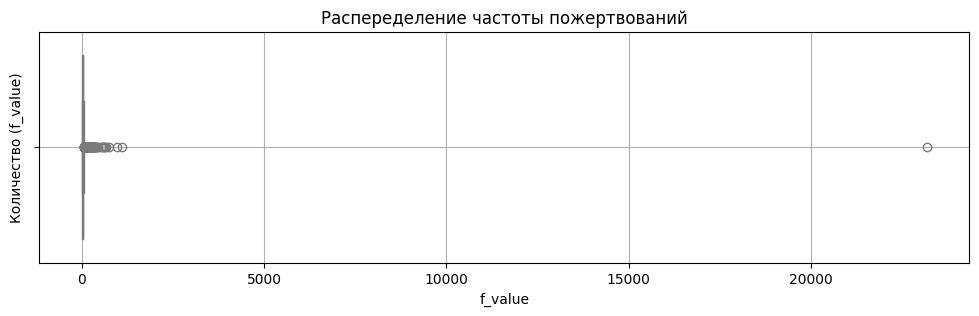

In [111]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=rfm['f_value'])
plt.title('Распеределение частоты пожертвований')
plt.ylabel('Количество (f_value)')
plt.grid(True)
plt.show()

In [112]:
# Определение значения 95-го процентиля
rfm_percentile_95 = rfm['f_value'].quantile(0.95)

# Фильтрация таблицы
rfm_filtred = rfm[rfm['f_value'] <= rfm_percentile_95]

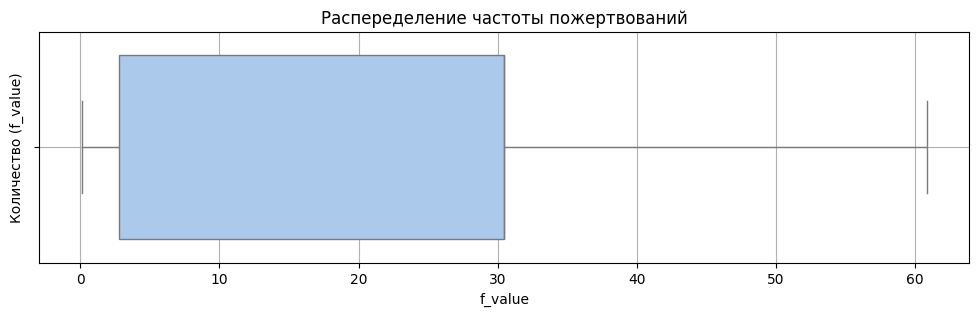

In [113]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=rfm_filtred['f_value'])
plt.title('Распеределение частоты пожертвований')
plt.ylabel('Количество (f_value)')
plt.grid(True)
plt.show()

count   16156.00
mean       24.96
std        17.59
min         0.09
25%         2.77
50%        30.44
75%        30.44
max        60.88
Name: f_value, dtype: float64
f_value
30.44    9641
60.88    1614
1.31       87
20.29      35
15.22      28
         ... 
0.11        1
0.97        1
0.41        1
0.48        1
26.09       1
Name: count, Length: 2296, dtype: int64


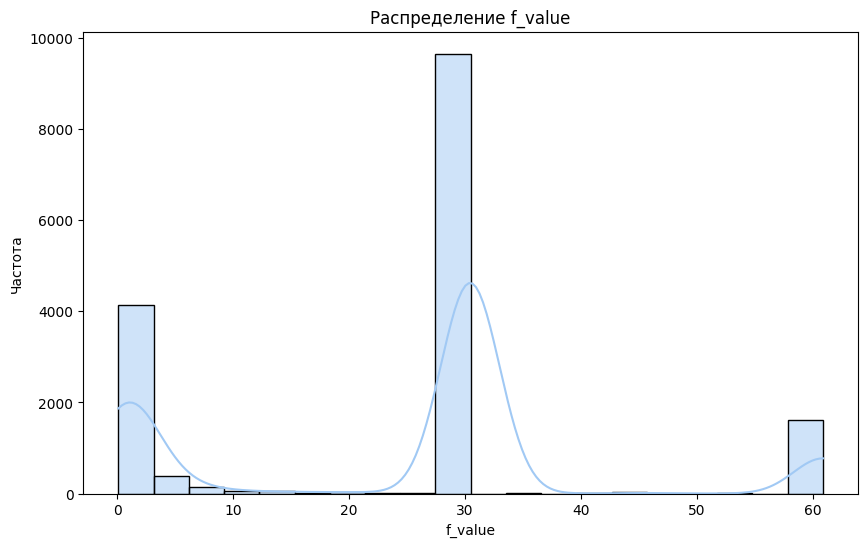

In [114]:
# Анализ распределения значений f_value
print(rfm_filtred['f_value'].describe())
print(rfm_filtred['f_value'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(rfm_filtred['f_value'], bins=20, kde=True)
plt.title('Распределение f_value')
plt.xlabel('f_value')
plt.ylabel('Частота')
plt.show()

**Recency (R)**

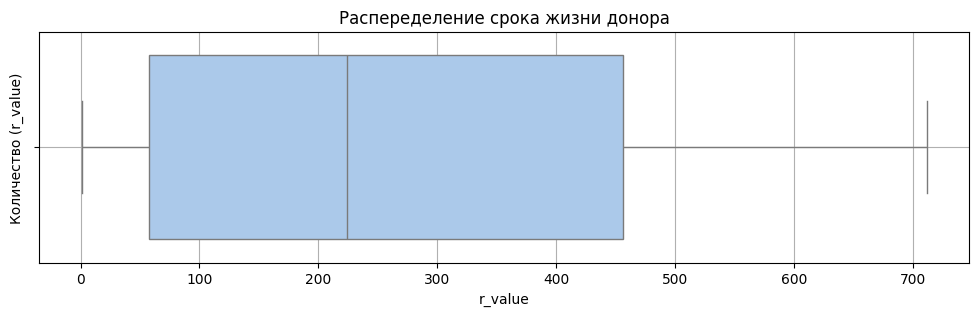

In [115]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=rfm_filtred['r_value'])
plt.title('Распеределение срока жизни донора')
plt.ylabel('Количество (r_value)')
plt.grid(True)
plt.show()

count   16156.00
mean       24.96
std        17.59
min         0.09
25%         2.77
50%        30.44
75%        30.44
max        60.88
Name: f_value, dtype: float64
f_value
30.44    9641
60.88    1614
1.31       87
20.29      35
15.22      28
         ... 
0.11        1
0.97        1
0.41        1
0.48        1
26.09       1
Name: count, Length: 2296, dtype: int64


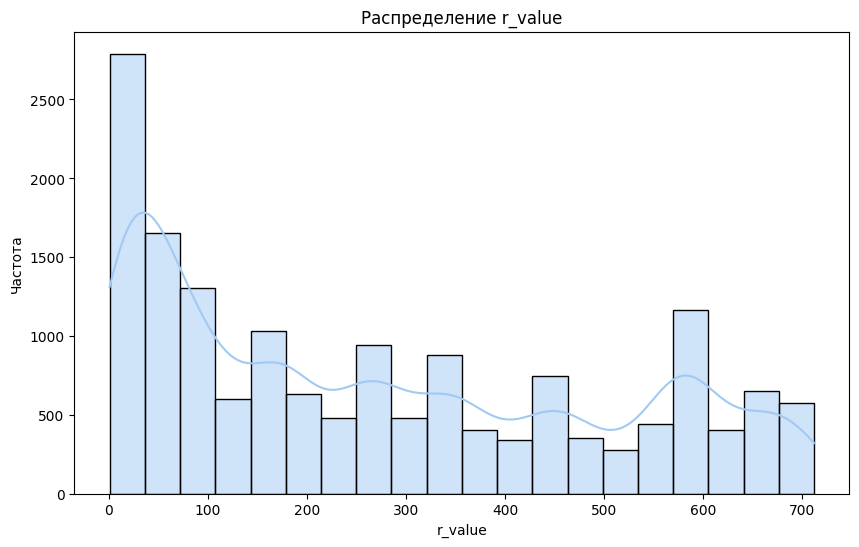

In [116]:
# Анализ распределения значений r_value
print(rfm_filtred['f_value'].describe())
print(rfm_filtred['f_value'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(rfm_filtred['r_value'], bins=20, kde=True)
plt.title('Распределение r_value')
plt.xlabel('r_value')
plt.ylabel('Частота')
plt.show()

**Monetary (M)**

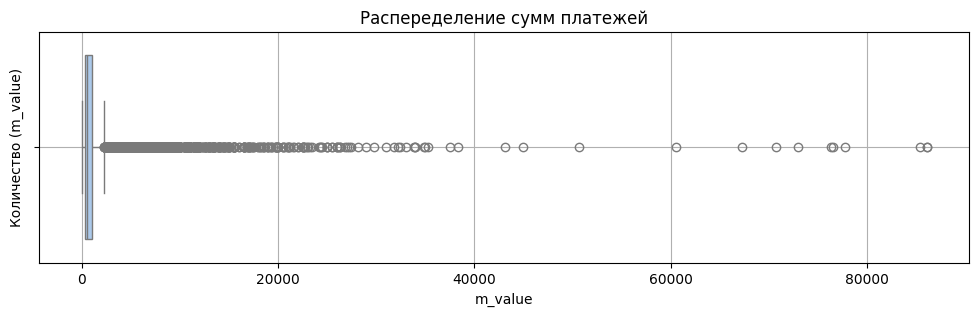

In [117]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=rfm_filtred['m_value'])

plt.title('Распеределение сумм платежей')
plt.ylabel('Количество (m_value)')
plt.grid(True)
plt.show()

In [118]:
# Определение значения 95-го процентиля
rfm_percentile_95 = rfm['m_value'].quantile(0.95)

# Фильтрация таблицы
rfm_filtred = rfm[rfm['m_value'] <= rfm_percentile_95]

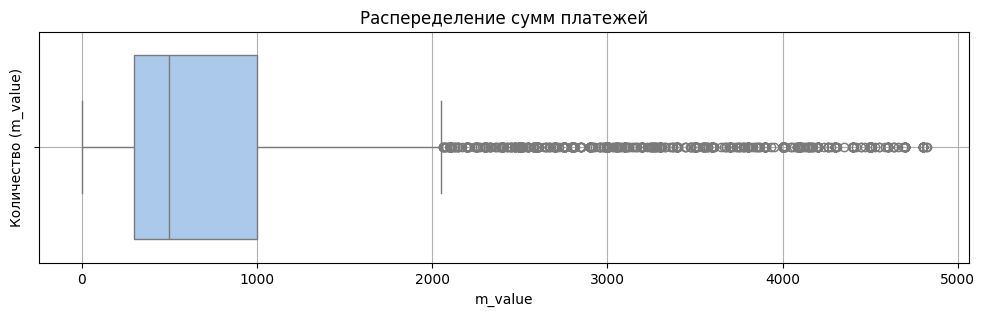

In [119]:
plt.figure(figsize=(12, 3))
sns.boxplot(x=rfm_filtred['m_value'])
plt.title('Распеределение сумм платежей')
plt.ylabel('Количество (m_value)')
plt.grid(True)
plt.show()

count   16034.00
mean      851.17
std       885.71
min         1.00
25%       300.00
50%       500.00
75%      1000.00
max      4825.00
Name: m_value, dtype: float64
m_value
500     2694
300     2595
1000    1408
200     1123
100     1024
        ... 
2905       1
1723       1
129        1
4510       1
198        1
Name: count, Length: 741, dtype: int64


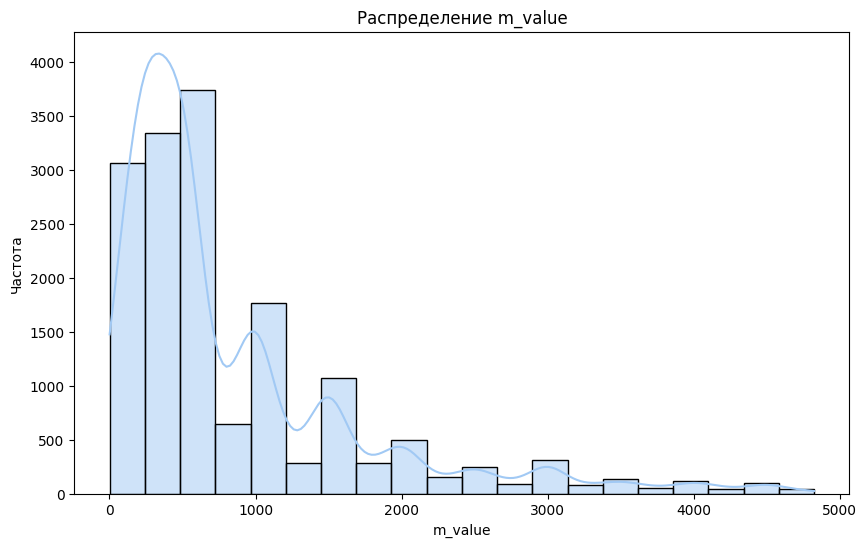

In [120]:
# Анализ распределения значений m_value
print(rfm_filtred['m_value'].describe())
print(rfm_filtred['m_value'].value_counts())

plt.figure(figsize=(10, 6))
sns.histplot(rfm_filtred['m_value'], bins=20, kde=True)
plt.title('Распределение m_value')
plt.xlabel('m_value')
plt.ylabel('Частота')
plt.show()

In [121]:
# Задание границ для каждой метрики
r_bins = [0, 240, 480, np.inf]  # Границы для Recency
f_bins = [0, 2, 36, np.inf]      # Границы для Frequency
m_bins = [0, 900, 4000, np.inf]   # Границы для Monetary

# Присвоение оценок на основе заданных границ
rfm['R'] = pd.cut(rfm['r_value'], bins=r_bins, labels=[3, 2, 1], right=False, include_lowest=True)
rfm['F'] = pd.cut(rfm['f_value'], bins=f_bins, labels=[1, 2, 3], right=False, include_lowest=True)
rfm['M'] = pd.cut(rfm['m_value'], bins=m_bins, labels=[1, 2, 3], right=False, include_lowest=True)

In [122]:
# Объединение оценок в RFM сегмент
rfm.loc[:, 'RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

In [123]:
# Создание сводной таблицы по сегментам
rfm_summary = rfm.groupby('RFM_Score').agg({
    'user_id': 'count',
    'orders_count': 'mean',
    'm_value': 'mean',
    'r_value': 'mean',
    'f_value': 'mean'
}).rename(columns={
    'user_id': 'customer_count',
    'orders_count': 'avg_orders_count',
    'm_value': 'avg_monetary_value',
    'r_value': 'avg_recency',
    'f_value': 'avg_frequency'
}).reset_index()

rfm_summary.head()

,RFM_Score,customer_count,avg_orders_count,avg_monetary_value,avg_recency,avg_frequency
0,111,131,2.96,457.09,531.53,1.16
1,112,111,3.53,1696.37,527.27,1.12
2,113,9,4.33,4444.44,513.89,1.45
3,121,2464,1.05,324.00,610.08,29.82
4,122,567,1.44,1221.74,613.27,26.39


In [124]:
# Таблица для тепловой карты по RFM

rfm_table = rfm.pivot_table(
    index ='F',
    columns = 'R',
    values = 'm_value',
    aggfunc=np.mean).applymap(float)

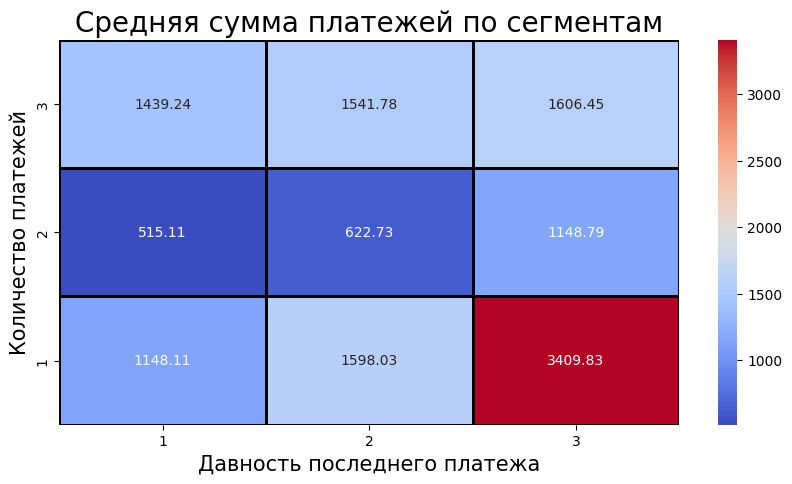

In [125]:
plt.figure(figsize=(10, 5))
sns.heatmap(rfm_table, annot=True, fmt='.2f', linewidths=1, linecolor='black',
            cmap = 'coolwarm')
plt.title('Средняя сумма платежей по сегментам', fontsize=20, color='black')
plt.xlabel('Давность последнего платежа', fontsize=15, color='black')
plt.ylabel('Количество платежей', fontsize=15, color='black')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

Чем больше цифра, тем более постоянный и часто платяжий благотворитель. Внутри квадратов указаны средние суммы, которая такие клиенты обычно платят.

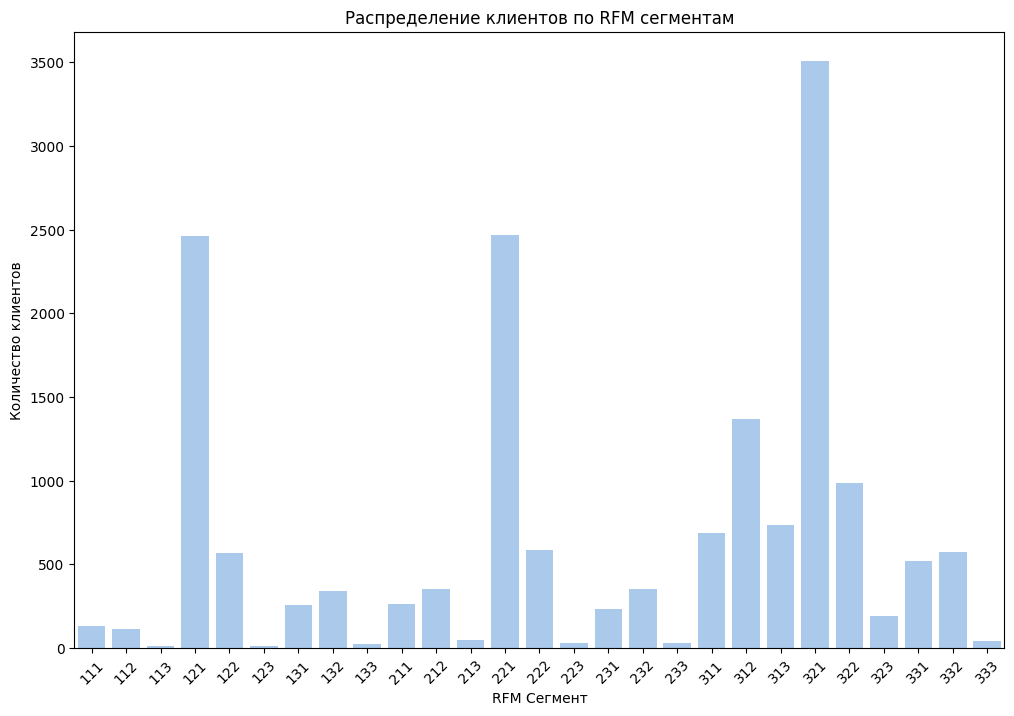

In [126]:
plt.figure(figsize=(12, 8))
sns.barplot(data=rfm_summary, x='RFM_Score', y='customer_count')
plt.title('Распределение клиентов по RFM сегментам')
plt.xlabel('RFM Сегмент')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()

Описание сегментов: 1 - плохо, 3 - хорошо

|Ранг/Показатель|R|F|M|
|:--|:--:|:--:|:--:|
|1|Не был больше чем 480 дней|Покупает реже чем раз в 36 месяцев (три года)|Чек до 900|
|2|Был от 240 до 480 дней|Покупает в период от 2 до 36 месяцев|Чек от 900 до 4000|
|3|Был меньше чем 240 дней назад|Покупает раз в 2 месяца|Чек выше 4000|

|Сегмент|Тип клиентов|Стратегия|
|:--|:--|:--|
|333|**Топы**|Необходимо выстраивать с ними персонализированные отношения,предоставлять отчеты о влиянии их пожертвований и благодарить их через эксклюзивные мероприятия и программы лояльности. Более детально выяснить их портрет|
||-заказывали недавно||
||-часто обращаются||
||-много тратят||
|332, 331, 322|**Лояльные**|Эти доноры регулярно делают пожертвования, но суммы их пожертвований могут быть ниже. Следует поощрять их к увеличению пожертвований через предоставление подробных отчетов о расходах и успехах фонда. Можно предложить им специальные акции или программы, чтобы стимулировать их к более частым и большим пожертвованиям.|
||-заказывали недавно||
||-тратят часто или средне||
||-тратят не очень много||
|323, 233, 223|**Крупные**|Стратегия должна быть направлена на увеличение их частоты пожертвований. Можно проводить специальные кампании и мероприятия, подчеркивая важность постоянной поддержки, чтобы они почувствовали необходимость делать пожертвования чаще. Продвигать реккурент|
||-заказывают нерегулярно||
||-тратят много||
|232, 231, 222, 221, 212, 211|**Неактивные:** давно не обращались|Необходимо понять причины их неактивности и попробовать вернуть их внимание через персонализированные сообщения, напоминающие о важных достижениях фонда и о том, как их поддержка помогает достигать новых высот. |
|213, 133, 123, 113|**Крупные неактивные**|Не плохо было бы получить ОС о том, почему перестали жертвовать. Необходимо выстроить с ними более глубокие отношения, выяснить причины их неактивности и попробовать вернуть их через личные встречи или специальные мероприятия. Подчеркните значимость их прошлой поддержки и как она помогла фонду.|
||-заказывали давно||
||-тратят много||
|321, 313, 312, 311	|**Новые**: недавно заказывали впервые|Очень важно правильно выстроить первые впечатления. Можно предоставлять им подробную информацию о деятельности фонда, показывать результаты и благодарить их за поддержку. Можно предложить вступить в программы лояльности или подписаться на регулярные обновления о деятельности фонда.|
|132, 131, 122, 121|**Почти потерянные:** в прошлом много заказывали, но давно не обращались|Не стоит тратить слишком много времени, но не стоит исключать из рассылок, может быть запросить ОС через почту. Сильно не надоедать|
|112, 111|**Ушедшие**|В зависимости от ресурсов конечно, но время тратить не стоит|
||-заказывали немного||
||-давно не обращались||

In [127]:
def make_segments(cell: str) -> str:
    'присвоение типа клиенту в зависимости от RFM сегмента'
    new_cell = ''
    if cell in ['333']:
        new_cell = 'топ'
    elif cell in ['332', '331', '322']:
        new_cell = 'лояльный'
    elif cell in ['323', '233', '223']:
        new_cell = 'крупный'
    elif cell in ['232', '231', '222', '221', '212', '211']:
        new_cell = 'неактивный'
    elif cell in ['213', '133', '123', '113']:
        new_cell = 'крупный неактивный'
    elif cell in ['321', '313', '312', '311']:
        new_cell = 'новый'
    elif cell in ['132', '131', '122', '121']:
        new_cell = 'почти потерянный'
    else:
        new_cell = 'ушедший'
    return new_cell

In [128]:
rfm['segment'] = rfm['RFM_Score'].apply(make_segments)

In [129]:
# Группировка данных по сегментам и подсчет количества id в каждом сегменте
segment_counts = rfm.groupby('segment')['user_id'].count() \
.reset_index().sort_values(by='user_id', ascending=False)

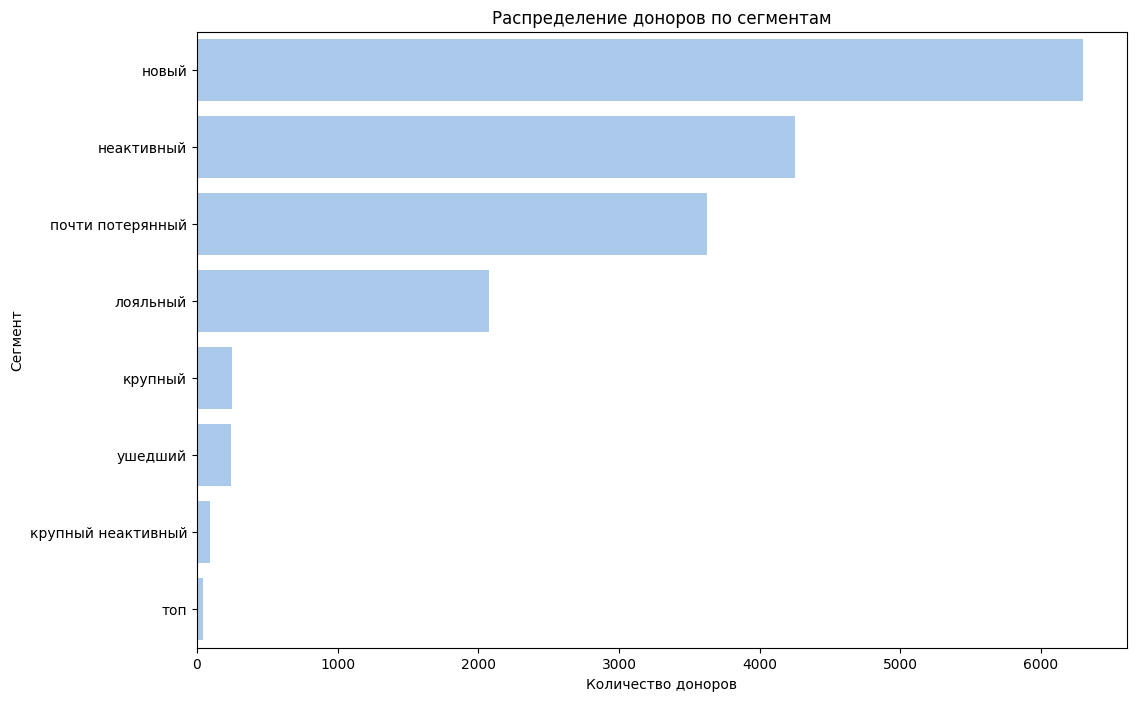

In [130]:
plt.figure(figsize=(12, 8))
sns.barplot(data=segment_counts, x='user_id', y='segment')
plt.title('Распределение доноров по cегментам')
plt.xlabel('Количество доноров')
plt.ylabel('Сегмент')
plt.xticks()
plt.show()

На графике выше мы видим сколько доноров в каждом сегменте, что нагляно показывает зоны роста. Необходимо направлять усилия на работу с новыми и почти потерянными донорами, так как это большое количество от общего числа.

**Сегменты клиентов, которые обеспечили ТОП 10 эффективных акций согласно индексу `effect`**

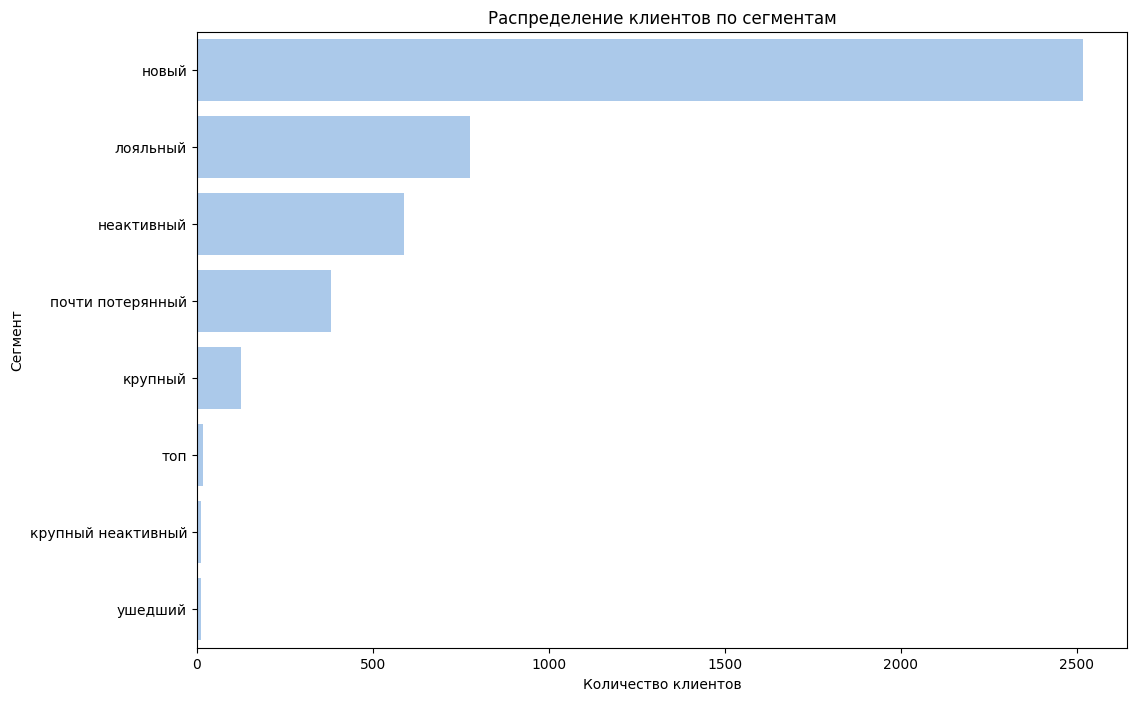

In [131]:
# Группировка данных по сегментам и подсчет количества id в каждом сегменте
segment_counts_top = rfm[rfm['user_id'].isin(order_top_effect['user_id'])] \
.groupby('segment')['user_id'].count().reset_index().sort_values(by='user_id', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=segment_counts_top, x='user_id', y='segment')
plt.title('Распределение клиентов по cегментам')
plt.xlabel('Количество клиентов')
plt.ylabel('Сегмент')
plt.xticks()
plt.show()

**Анализ вкладов сегментов в общие доходы**

Отображает совокупные доходы, генерируемые каждым сегментом.

Поможет понять, какие сегменты приносят наибольшие доходы и на какие сегменты стоит сосредоточить маркетинговые усилия.

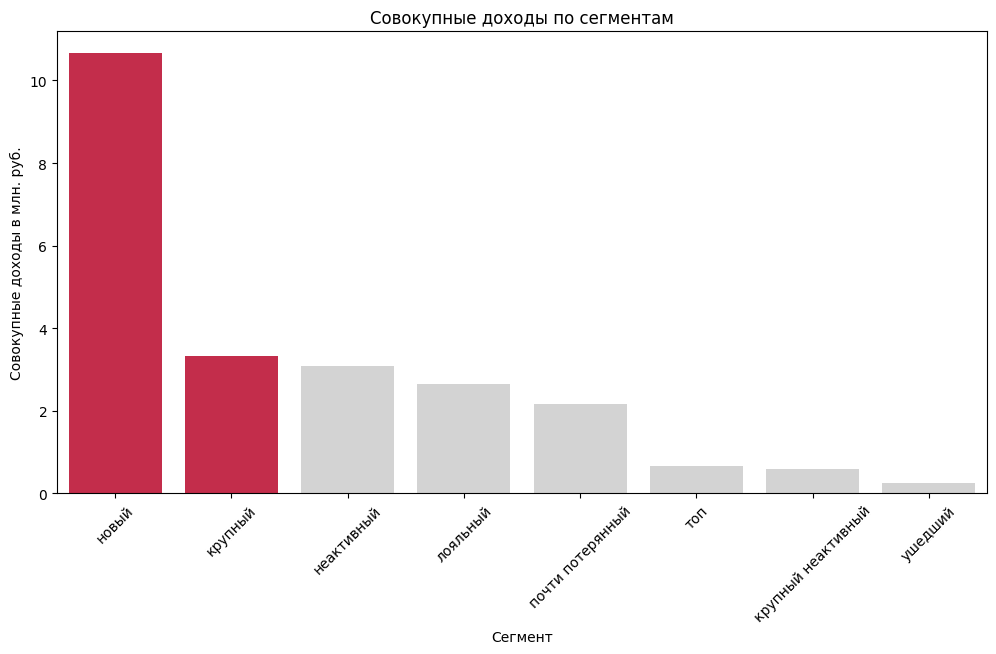

In [132]:
# Сгруппируем данные по сегментам и суммируем доходы
segment_revenue = rfm.groupby('segment')['m_value'].sum().reset_index().sort_values(by='m_value', ascending=False)
segment_revenue['m_value'] = segment_revenue['m_value'] / 1000000

colors = ['lightgrey'] * 8
colors[0], colors[1] = 'crimson', 'crimson'


# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_revenue, x='segment', y='m_value', palette=colors, hue='segment', legend=False)
plt.title('Совокупные доходы по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('Совокупные доходы в млн. руб.')
plt.xticks(rotation=45)
plt.show()

In [133]:
rfm['start_date'] = pd.to_datetime(rfm['start_date'])
rfm['end_date'] = pd.to_datetime(rfm['end_date'])

**Динамика изменений сегментов**

Показывает, как количество клиентов в каждом сегменте изменяется с течением времени.

Это поможет отслеживать эффективность маркетинговых стратегий и видеть, какие сегменты растут или сокращаются.

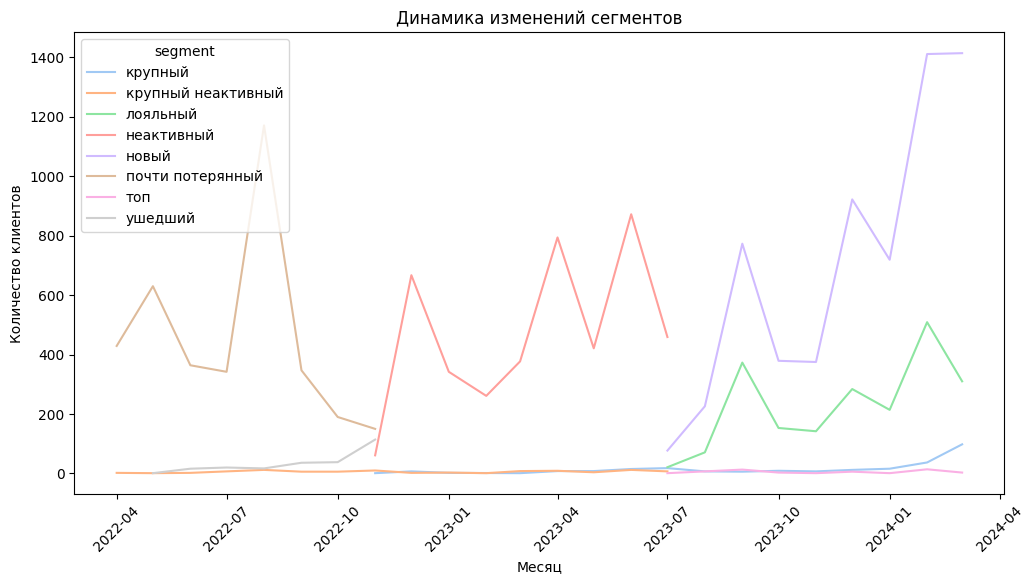

In [134]:
# Создадим столбец с месяцами
rfm['month'] = rfm['end_date'].dt.to_period('M')

# Сгруппируем данные по сегментам и месяцам
segment_dynamic = rfm.groupby(['segment', 'month']).size().reset_index(name='count')

# Преобразование столбца month обратно в datetime для правильного отображения на графике
segment_dynamic['month'] = segment_dynamic['month'].dt.to_timestamp()

# Построение линейного графика
plt.figure(figsize=(12, 6))
sns.lineplot(data=segment_dynamic, x='month', y='count', hue='segment')
plt.title('Динамика изменений сегментов')
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()

In [135]:
order = order.merge(id_donor[['user_id', 'area_name']], on='user_id', how='left')

# Замена NaN значением 'Не указано'
order['area_name'] = order['area_name'].fillna('Не указано')

regions = order.groupby('area_name').agg({'user_id': 'nunique', 'order_total_price':'sum'}) \
.reset_index().rename(columns={'user_id': 'count'}).sort_values(by='order_total_price', ascending=False)

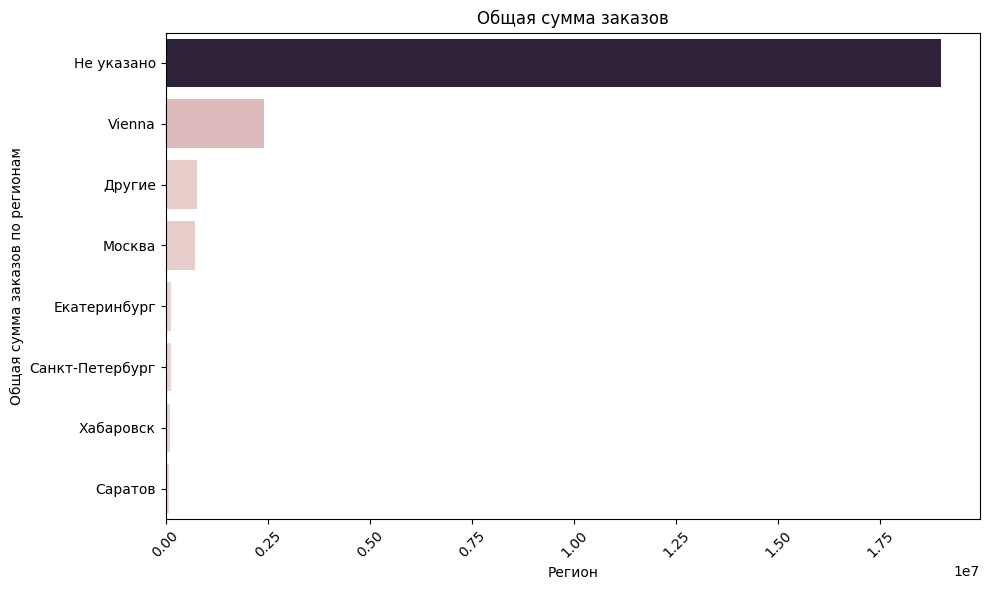

In [136]:
# Присвоение категорий "другие" для регионов с order_total_price <= 70000

region_totals = regions.copy()

# Присвоение категорий "другие" для регионов с order_total_price <= 70000
region_totals['area_name'] = region_totals.apply(lambda row: 'Другие' if row['order_total_price'] <= 70000 and row['area_name'] != 'Не указано' else row['area_name'], axis=1)

# Суммирование значений для категории "другие"
region_totals = region_totals.groupby('area_name')['order_total_price'].sum().reset_index().sort_values(by='order_total_price', ascending=False)

# Построение бар-чарта
plt.figure(figsize=(10, 6))
sns.barplot(data=region_totals, x='order_total_price', y='area_name', hue='order_total_price', legend=False)
plt.xlabel('Регион')
plt.ylabel('Общая сумма заказов по регионам')
plt.title('Общая сумма заказов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Кажется, что смотреть распределения сумм, собранным по регионам без учёта пропусков будет не совсем верно. Это будет искажать действительность.

При этом на графике можно увидеть, что Вена и Москва в лидерах по суммам.

## Когортный анализ

In [137]:
order_last_year = order.query('date >= "2023-03-18"')

In [138]:
first_order = order_last_year.groupby('user_id')['date'].min().reset_index()
first_order.columns = ['user_id', 'first_order_date']

In [139]:
donor_data = pd.merge(order_last_year, first_order, on='user_id')

In [140]:
# Создание когорт
donor_data['cohort'] = donor_data['first_order_date'].dt.to_period('M')


In [141]:
order_last_year['period_number'] = ((order_last_year['date'].dt.to_period('M')
                           - order_last_year['date'].dt.to_period('M')).apply(lambda x: x.n)) + 1

In [142]:
order_grouped = order_last_year.groupby(['user_id', 'period_number']).agg({
    'order_total_price': 'sum',
    'order_id': 'count'
}).reset_index()

In [143]:
order_grouped.columns = ['user_id', 'period_number', 'total_amount', 'order_count']

In [144]:
donor_order = pd.merge(donor_data, order_grouped, on='user_id', how='left')

In [145]:
donor_order['order_period'] = donor_order['date'].dt.to_period('M')

# Определяем последний полный месяц
last_full_month = donor_order['date_time'].max().to_period('M') - 1

# Исключаем доноров, которые совершили первую оплату в последнем неполном месяце
donor_order = donor_order[donor_order['cohort'] <= last_full_month]

In [146]:
donor_order['cohort_index'] = ((donor_order['order_period'] - donor_order['cohort']).apply(lambda x: x.n)) + 1

In [147]:
cohort_counts = donor_order.pivot_table(
    index='cohort',
    columns='cohort_index',
    values='user_id',
    aggfunc='nunique'
)

In [148]:
# Получение размера каждой когорты
cohort_sizes = cohort_counts.iloc[:, 0]

# Рассчитываем удержание путем деления на размер когорты
retention = cohort_counts.divide(cohort_sizes, axis=0)

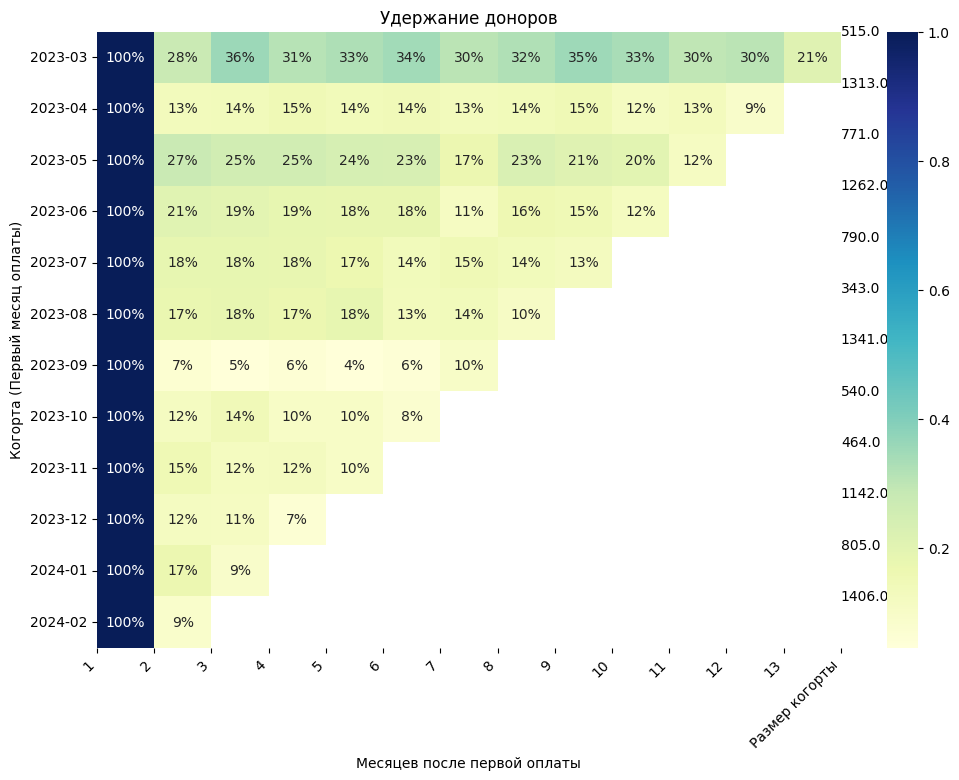

In [149]:
# Построение тепловой карты удержания
plt.figure(figsize=(12, 8))
ax = sns.heatmap(retention, annot=True, fmt=".0%", cmap="YlGnBu")

# Добавление размеров когорт в правую часть графика
for i in range(len(cohort_sizes)):
    ax.text(len(retention.columns), i, f'{cohort_sizes[i]}', color='black', ha='left', va='center')

# Обновление меток осей
plt.title('Удержание доноров')
plt.ylabel('Когорта (Первый месяц оплаты)')
plt.xlabel('Месяцев после первой оплаты')

# Перемещение и настройка меток для последней колонки
ax.set_xticks(list(range(len(retention.columns))) + [len(retention.columns)])
ax.set_xticklabels(list(retention.columns) + ['Размер когорты'], rotation=45, ha='right')

plt.show()

In [150]:
# Группировка данных для расчета количества покупок и общей суммы по когорте и периоду
cohort_data = donor_order.groupby(['cohort']).agg({
    'order_id': 'count',        # Количество покупок
    'order_total_price': 'sum'  # Общая сумма покупок
}).reset_index()

cohort_data.columns = ['cohort', 'order_count', 'total_amount']

In [151]:

# Расчет среднего чека по когорте и периоду
cohort_data['average_order_value'] = cohort_data['total_amount'] / cohort_data['order_count']

# Группировка данных для расчета количества уникальных пользователей в когорте
cohort_sizes = donor_order.groupby('cohort')['user_id'].nunique().reset_index()
cohort_sizes.columns = ['cohort', 'num_users']

# Расчет LTV по когорте и периоду
cohort_data = cohort_data.merge(cohort_sizes, on='cohort', how='left')
cohort_data['ltv'] = cohort_data['total_amount'] / cohort_data['num_users']

In [152]:
# Переименование столбцов
cohort_data.columns = ['Когорта', 'Количество_платежей', 'Общая_сумма_оплат', 'Средний_чек', 'Количество_доноров', 'LTV']

# Применение градиентной раскраски только к выбранным столбцам
cohort_data_styled = cohort_data.style.background_gradient(subset=['Общая_сумма_оплат', 'Средний_чек', 'LTV'], cmap='RdYlGn')

# Округление значений до двух знаков после запятой
cohort_data_styled = cohort_data_styled.format({
    'Общая_сумма_оплат': '{:.2f}',
    'Средний_чек': '{:.2f}',
    'LTV': '{:.2f}'
})


cohort_data_styled

,Когорта,Количество_платежей,Общая_сумма_оплат,Средний_чек,Количество_доноров,LTV
0,2023-03,4747,1714790.00,361.24,515,3329.69
1,2023-04,5430,2186841.00,402.73,1313,1665.53
2,2023-05,4493,1899375.00,422.74,771,2463.52
3,2023-06,5344,2198061.00,411.31,1262,1741.73
4,2023-07,3123,1305536.00,418.04,790,1652.58
5,2023-08,1215,536687.00,441.72,343,1564.69
6,2023-09,2802,1258633.00,449.19,1341,938.58
7,2023-10,1369,592192.00,432.57,540,1096.65
8,2023-11,1112,484930.00,436.09,464,1045.11
9,2023-12,3752,1396568.00,372.22,1142,1222.91


## Общие выводы

 **Старые доноры:** Около 15% старых доноров находятся в новой базе, но при этом это около 50% от всех старых доноров.

**Основной период анализа `апрель 2020 год` по `март 2024 год`**

**Рекурент:** Мы имеем много пропусков в данных и корректно отразить процент платящих по подписке и без не удалось. По имеющимся данным, из только 2.7% доноров платят по подписке, а 22% без.

**Каналы привлечения:**  Активность в основном рождается через Email и сайт Mindbox.

**Эффективность каналов:** С точки зрения того, как относятся касания к суммам платежей, лидируют `MindBox`, `WebPush`, `telegram`, `vse`, `ok.ru`. Стоит развивать каналы с хорошей эффективностью, но которые пока не являются лидерами в абсоютных суммах по донорам или пожертвованиям.

Было обнаружено, что маркетинг в целом работает. Пики по количеству платежей и их суммах на графиках совпадают маркетинговой активностью.


**Акции** - Были найдены более и менее успешные акции, но выводы тут сделать сложно. Эти данные были найдены для того, чтобы можно было посмотреть на одни кампании, на другие и сравнить их.

**Платежи:**  Только 65% платежей успешны от общего количества попыток. 11.5% ошибка платежа и почти 23% - платеж не завершён.

**RFM -анализ** Начиная с осени 2023 года удалось сильно увеличить количество доноров в сегменте "новый" и "лояльный", что очень хорошо. Нужно обратить внимание на сегмент "топ" и "крупный" их количество почти не увеличилось, но они представляют интерес для фонда. (более подробно о сегментах в блоке с RFM анализов)

**География** В большинстве случаев локация клиента не указана, но можно выделить Москву и Вену, как лидирующие города по суммам платежей из того, что есть. Другие регионы РФ ведут себя также активно, но если есть интерес в таргетировании по географии, нужно как-то улучшать сбор данных.

**Когортный анализ:** По оттоку доноров можно сказать то, что с осени 2023 года мы стали больше привлекать новых доноров, которые стали обеспечивать фонд существенными суммами на наши цели, при этом удержание таких доноров хуже, чем это было до роста, причем существенно.

---

**ОБЩИЙ ВЫВОД:**

Было проведено исследование, которое позволит найти слабые и сильные места в работе фонда. То, что было сделано, есть некий обзор на то, как живёт фонд. На основе этих данных и наблюдений, можно взять курс на более глубокий анализ.

**Предложения по дальнейшему исследованию:**

1. Использовать RMF анализ и регулярно смотреть динамику по сегментам (например каждый квартал)

2. Поработать с воронкой, посмотреть конверсию на каждом шаге, чтобы найти недостатки. Как пример это то, что на моменте оплаты не у всех получается это сделать и нужно проверить, это нормально или есть технические причины.

3. Обратить внимание на успешные акции и проанализировать почему же они получили отклик у людей. Что было сделано не верно с акциями, которые не так хорошо прошли по сборам.

4. Воспользовшись информацией о каналах привлечения, можно пересмотреть приоритетность того или  иного канала. Конечно, необходимо более детально это исследовать.